<font size = "9"><center>Machine Learning</center></font>

# Lab - machine learning in python

# Lab 1: Introduction to Python

## Loading data

### Boston data

In [1]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

#### data dimension

In [2]:
print(data.shape)

(506, 13)


#### subset of data

In [7]:
data[1:10,1]

array([ 0. ,  0. ,  0. ,  0. ,  0. , 12.5, 12.5, 12.5, 12.5])

In [8]:
data[1:3,0:2]

array([[0.02731, 0.     ],
       [0.02729, 0.     ]])

### Iris data

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

c:\Python37\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
c:\Python37\lib\site-packages\sklearn\datasets\base.py:241: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional inf

In [7]:
print(iris.data.shape)
print(iris.target_names)

(150, 4)
['setosa' 'versicolor' 'virginica']


#### The first two features

In [8]:
X = iris.data[:, :2]
y = iris.target

#### Plot the first two features

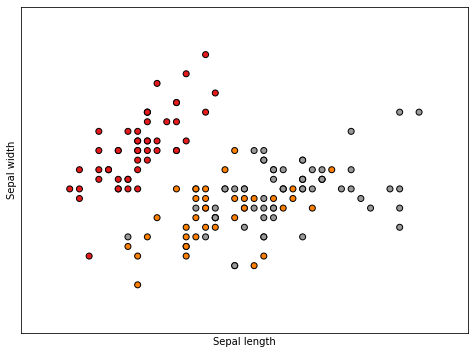

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

plt.figure(2, figsize=(8, 6))
plt.clf()

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

#### Plot the first three PCA dimensions

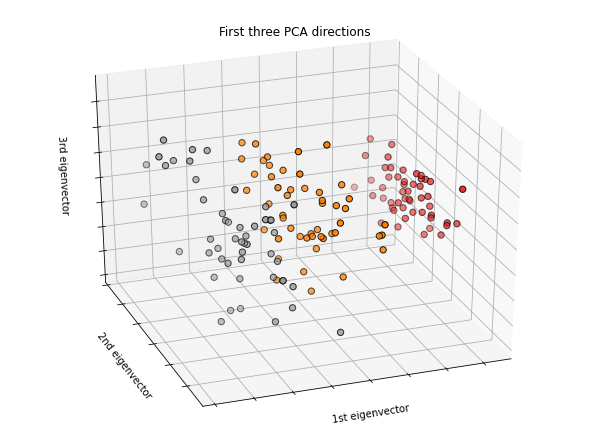

In [10]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

### Digit data

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
print(digits.data.shape)
print(digits.target)

(1797, 64)
[0 1 2 ... 8 9 8]


#### Plot an image

<Figure size 432x288 with 0 Axes>

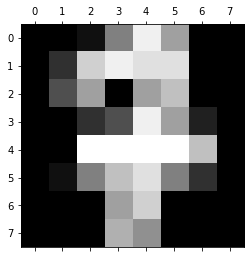

In [ ]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[17]) 
plt.show()

## Simulating data

### Generate random numbers [0,1]

In [ ]:
from random import seed
from random import random

seed(14)
for _ in range(10):
    value = random()
    print(value)

0.10682853770165568
0.7025855239868555
0.6520420203142754
0.9403523895661179
0.27111522656032316
0.25577551343303917
0.7340593641446967
0.6584500182400758
0.3029879738883551
0.6842331280769555


### Generate random integers

In [ ]:
from random import seed
from random import randint
# seed random number generator
seed(1)
# generate some integers
for _ in range(10):
    value = randint(0, 10)
    print(value)

2
9
1
4
1
7
7
7
10
6


### Generating a random sample without replacement

In [ ]:
# select a random sample without replacement
from random import seed
from random import sample
# seed random number generator
seed(1)
# prepare a sequence
sequence = [i for i in range(20)]
print(sequence)
# select a subset without replacement
subset = sample(sequence, 5)
print(subset)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[4, 18, 2, 8, 3]


### Generating random numbers from distributions

Normal distribution
1.2881847531554629
1.449445608699771
0.06633580893826191
-0.7645436509716318
-1.0921732151041414
0.03133451683171687
-1.022103170010873
-1.4368294451025299
0.19931197648375384
0.13337460465860485

Uniform
0.8357651039198697
0.43276706790505337
0.762280082457942
0.0021060533511106927
0.4453871940548014
0.7215400323407826
0.22876222127045265
0.9452706955539223
0.9014274576114836
0.030589983033553536

Exponential
0.0025775205901396527
0.07796041064717965
0.27993297008677476
0.04799800085423127
0.02441110881957027
0.054838311851086355
0.0029470817314445606
0.025063251747169862
0.05760534377901244
0.06848065433446529

Gamma
[14.56354443627256, 14.659154776645254, 15.196838788368431, 7.773911922663126, 12.386276928248169, 38.401812833631894, 1.7724091434819835, 5.861701913254062, 4.427085711348484, 16.82512679095396]

Multivariate normal
[[ 0.7993733  -0.97671735]
 [-2.77892524 -1.73164501]
 [ 1.3598203  -0.14295309]
 [-0.35115513  0.68486719]
 [ 2.36986826 -0.38135847]
 

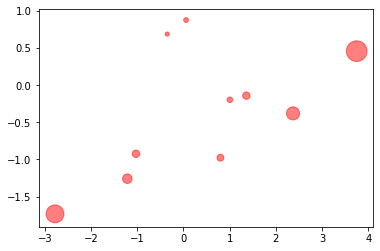

In [ ]:
import random

# seed random number generator
random.seed(1)

# generate some Gaussian values
print("Normal distribution")
for _ in range(10):
    value = random.gauss(0, 1)
    print(value)

# generate uniform    
print("\nUniform")
for _ in range(10):
    value = random.uniform(0, 1)
    print(value)

# generate exponential    
print("\nExponential")
for _ in range(10):
    value = random.expovariate(10)
    print(value)   
    
# generate Gamma  
print("\nGamma")
value = list(range(10))
for i in range(10):
    value[i] = random.gammavariate(1,10)
print(value) 

# generate multivariate normal
print("\nMultivariate normal")
import numpy as np
import matplotlib.pyplot as plt 
from scipy.stats import multivariate_normal

rmvn = np.array([x[:] for x in [[0.1]*2]*10])
for i in range(10):
    rmvn[i,] = multivariate_normal.rvs(mean = [0.5, -0.2], cov=[[2.0, 0.3], [0.3, 0.5]])
print(rmvn)

plt.scatter(rmvn[:,0], rmvn[:,1], s= 30*(rmvn[:,0]**2+rmvn[:,1]**2), c="red", alpha=0.5)

### Generate 2D classification points

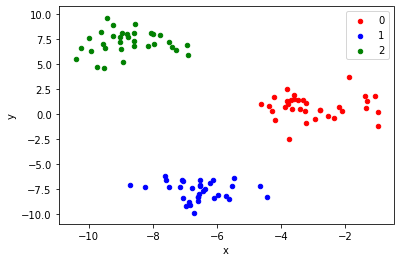

In [ ]:
from sklearn.datasets import make_blobs
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_blobs(n_samples=100, centers=3, n_features=2)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue', 2:'green'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

### Generating circle data for classification

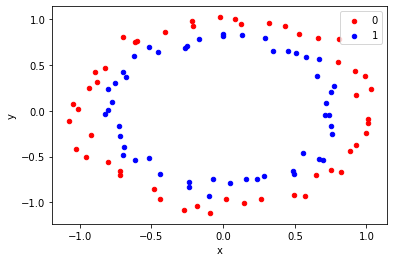

In [ ]:
from sklearn.datasets import make_circles
from matplotlib import pyplot
from pandas import DataFrame
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.05)
# scatter plot, dots colored by class value
df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

# Lab 2: Supervised Learning

## Linear Regression


Call:
lm(formula = data$y ~ data$x)

Coefficients:
(Intercept)       data$x  
      0.230        2.534  


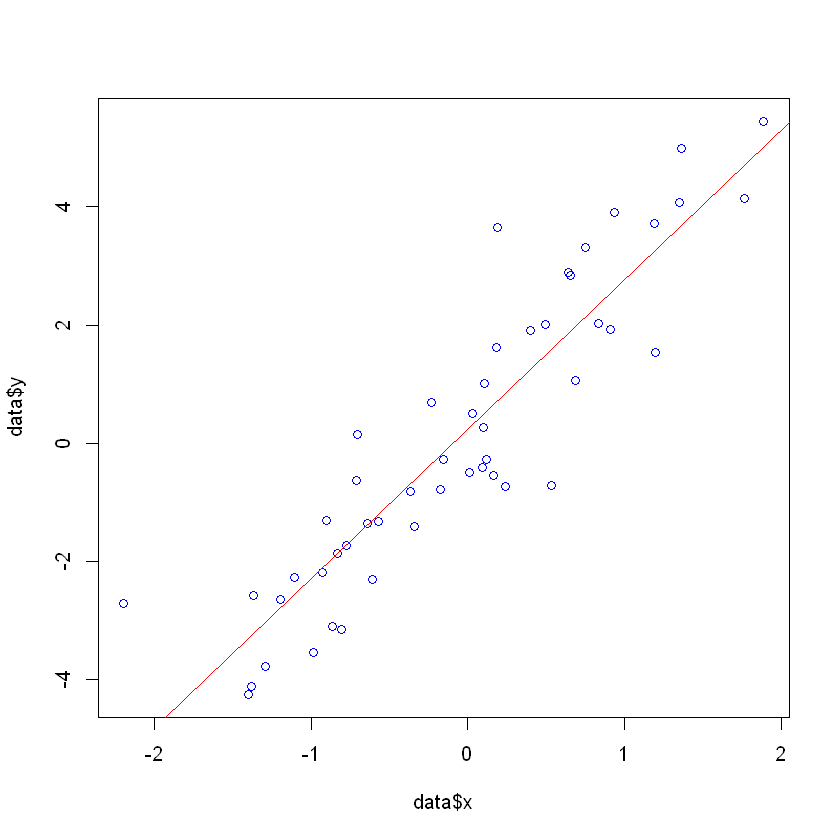

In [ ]:
b = c(0.35,2.7)
x = rnorm(50)
error = rnorm(50,mean=0,sd=1)
y = b[1]+b[2]*x + error

data = data.frame(cbind(y,x))

plot(data$x,data$y,col="blue")

result = lm(data$y~data$x)
result

abline(result$coef,col="red")

## Multivariate linear regression

y,X1,X2,X3
<dbl>,<dbl>,<dbl>,<dbl>
4.17610040,0.76848767,-0.83308729,0.80055909
0.27593101,-0.74280392,-0.73902097,1.14148975
-0.26479359,0.01413124,0.02403188,-1.12527407
3.09307681,-1.20764805,-0.60788748,0.85168895
-1.58163059,-1.04557945,0.29911631,-0.09296468
0.31441753,0.01232495,-0.62927890,-0.66387897
-1.46034392,0.64247223,3.69565442,-0.01344043
-1.44690623,-0.34095724,1.25574437,-0.54296529
0.01660969,0.21078007,-0.20318602,-0.42283406



Call:
lm(formula = data$y ~ data$X1 + data$X2 + data$X3)

Coefficients:
(Intercept)      data$X1      data$X2      data$X3  
     0.4673       1.8975      -0.8849       1.3772  


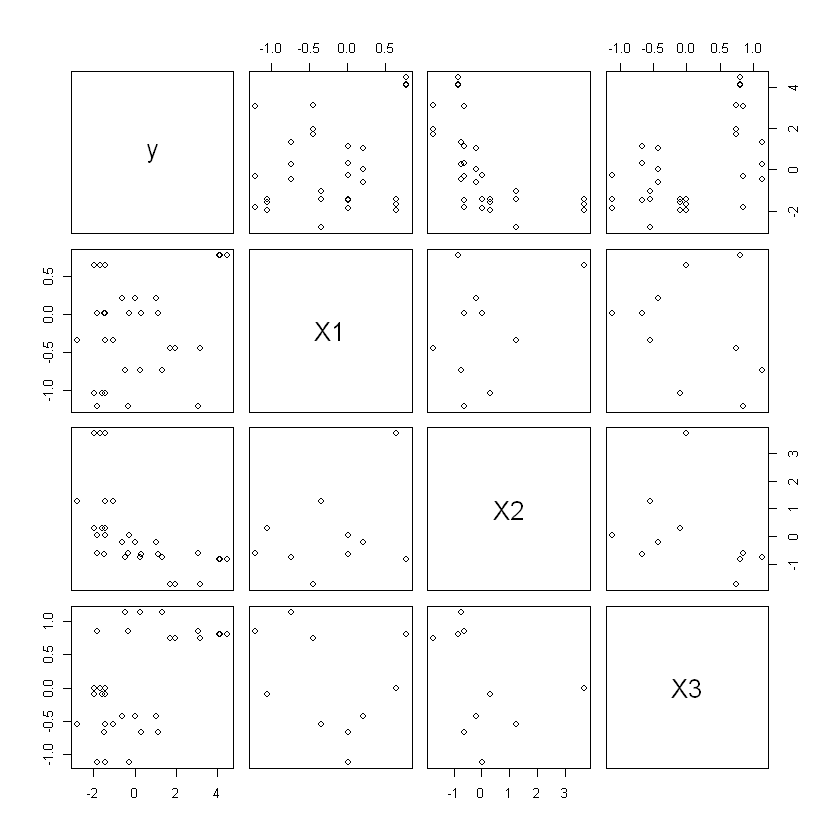

In [ ]:
x = matrix(rnorm(30),nrow=10,ncol=3)
b = c(0.5,2.1,-0.9,1.4)
error = rnorm(30,mean=0,sd=1)
y = b[1]+b[2]*x[,1]+b[3]*x[,2]+b[4]*x[,3]+error

data = data.frame(y,x)
data
pairs(data)

result = lm(data$y ~ data$X1 + data$X2 + data$X3)
result



## Classification by logistic model

In [ ]:
x = rnorm(100)
b = c(0.5, 0.9)
error = rnorm(100,mean=0,sd=1)
y = b[1]+b[2]*x+error
p = exp(y)/(1+exp(y))
group1 = which(p>0.5)
group2 = which(p<=0.5)
y[group1] = 1
y[group2] = 0

result = glm(y~x, family="binomial")

y_hat = result$coef[1]+result$coef[1]*x
p_hat = exp(y_hat)/(1+exp(y_hat))

print("estimated group1")
which(p_hat>0.5)

print("true group1")
group1

[1] "estimated group1"


[1]   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
[20]  22  24  25  26  27  28  29  32  33  34  35  37  38  39  40  41  42  44  45
[39]  47  48  50  51  52  53  54  55  56  58  59  60  61  62  63  64  65  66  67
[58]  69  70  71  72  73  74  75  76  78  79  80  81  83  84  86  87  88  90  91
[77]  92  93  94  95  96  98  99 100

[1] "true group1"


[1]   1   2   3   4   5   6   7   8  10  11  12  16  17  18  20  24  25  26  27
[20]  28  34  35  37  38  39  40  41  42  44  45  47  48  49  50  51  52  53  54
[39]  55  56  58  60  61  62  63  64  65  66  67  69  70  71  73  74  75  78  79
[58]  85  86  87  88  90  93  94  95  96  97  98  99 100

# Lab 3: Multivariate Methods

## Parameter Estimation

Let $𝑋={𝑋_1,…,𝑋_𝑃}$ be a $p$-dimension point. The mean vector is $\mu=𝐸(𝑋)$ and the covariance matrix is $Σ_{𝑝×𝑝}$

### Two normal distributions with different mean vectors and covariance matrix

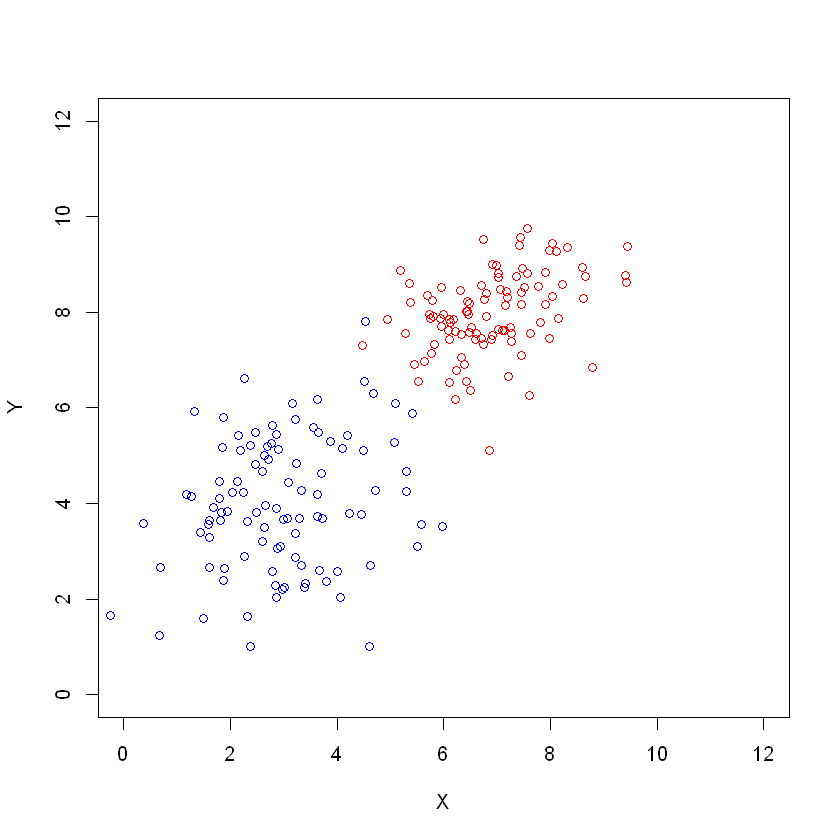

In [ ]:
library(MASS)
sigma1 = matrix(2,2,2)
sigma1[1,2] = sigma1[2,1]=0.5
bvn1 = mvrnorm(100, mu=c(3,4), Sigma=sigma1)

sigma2 = matrix(1,2,2)
sigma2[1,2] = sigma2[2,1] = 0.5
bvn2 = mvrnorm(100, mu=c(7,8), Sigma=sigma2)

plot(bvn1,xlim=c(0,12),ylim=c(0,12),col="blue",xlab="X",ylab="Y")
points(bvn2,col="red")

The mean vector 𝜇 can be estimated by the sample average

In [ ]:
bvn1_average = apply(bvn1,2,mean)
bvn2_average = apply(bvn2,2,mean)
print("the first group")
bvn1_average
print("the second group")
bvn2_average

[1] "the first group"


[1] 2.970569 3.999461

[1] "the second group"


[1] 6.870857 7.973889

The covariance matrix can be estimated by the sample covariance matrix

In [ ]:
bvn1_cov = cov(bvn1)
bvn2_cov = cov(bvn2)


In [ ]:
print("the first group")
bvn1_cov
print("the second group")
bvn2_cov

[1] "the first group"


1.5244015,0.3841454
0.3841454,1.9216225


[1] "the second group"


0.9969875,0.3247221
0.3247221,0.7232363


### Two classes may have a common covaraince matrix

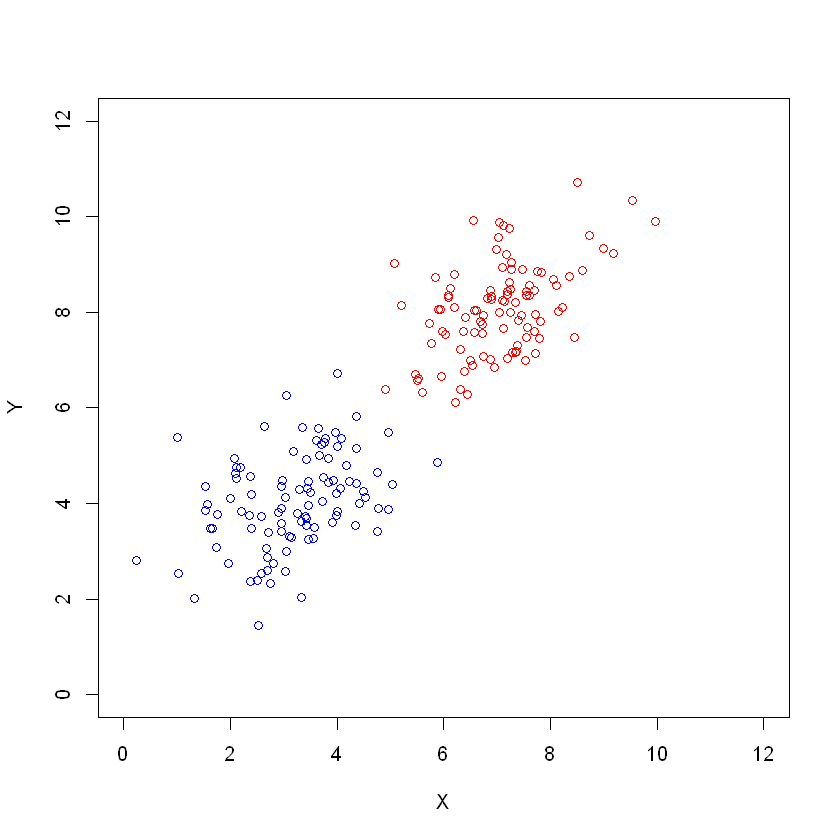

In [ ]:
sigma = matrix(1,2,2)
sigma[1,2] = sigma[2,1]=0.5

bvn1 = mvrnorm(100, mu=c(3,4), sigma)
bvn2 = mvrnorm(100, mu=c(7,8), sigma)

plot(bvn1,xlim=c(0,12),ylim=c(0,12),col="blue",xlab="X",ylab="Y")
points(bvn2,col="red")

The covariance matrix is estimated by the sample covariance of the pooled data

In [ ]:
pooldata = rbind(bvn1-mean(bvn1),bvn2-mean(bvn2))
bvn1_cov = cov(pooldata)

print("The pooled covariance matrix")
bvn1_cov

[1] "The pooled covariance matrix"


0.9596699,0.4049757
0.4049757,0.9473720


### The off-diagonal values of the common covariance matrix are 0 

In this case, the coordinate random variables $X_1,...X_p$ are independently distributed with a normal distribution

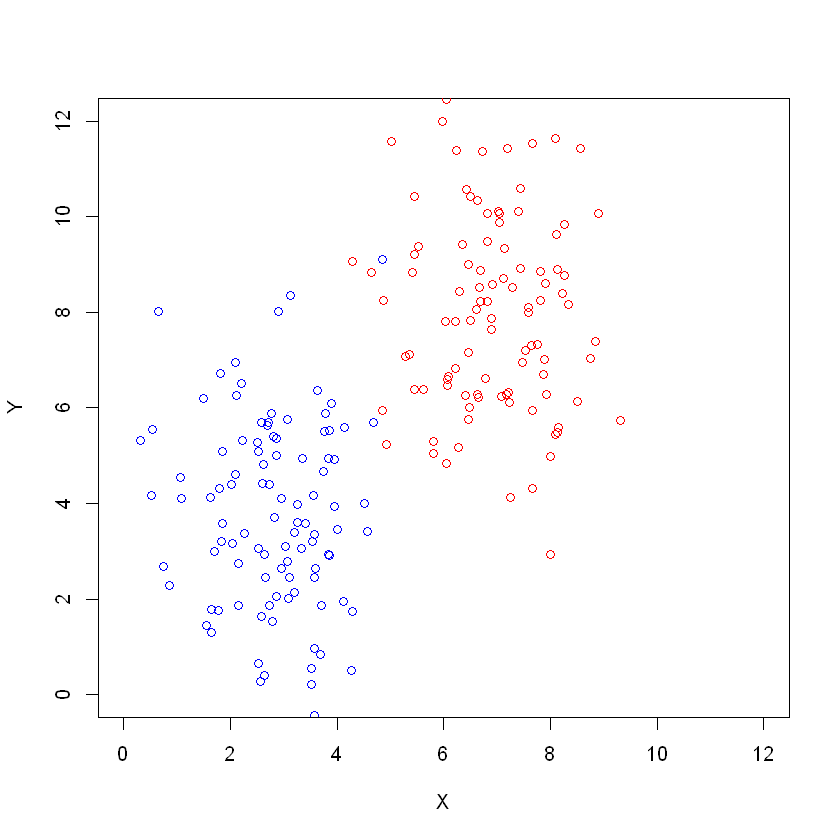

In [ ]:
sigma = matrix(1,2,2)
sigma[1,2] = sigma[2,1]= 0
sigma[2,2] = 4

bvn1 = mvrnorm(100, mu=c(3,4), sigma)
bvn2 = mvrnorm(100, mu=c(7,8), sigma)

plot(bvn1,xlim=c(0,12),ylim=c(0,12),col="blue",xlab="X",ylab="Y")
points(bvn2,col="red")

### The coordinate random variables are independent of each other and have a common variance

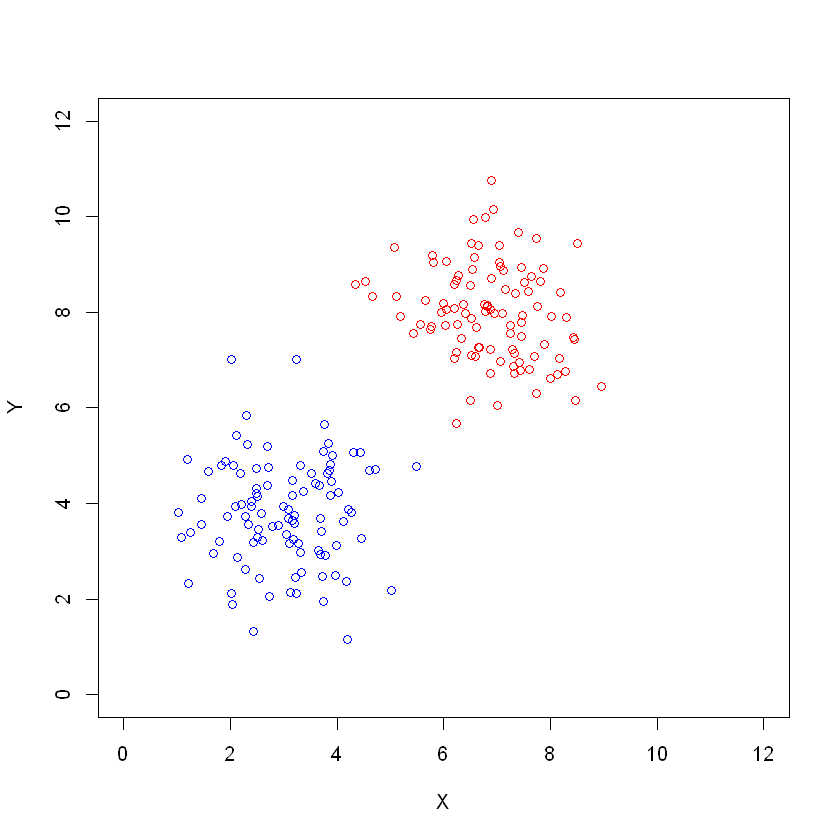

In [ ]:
sigma = matrix(1,2,2)
sigma[1,2] = sigma[2,1]= 0

bvn1 = mvrnorm(100, mu=c(3,4), sigma)
bvn2 = mvrnorm(100, mu=c(7,8), sigma)

plot(bvn1,xlim=c(0,12),ylim=c(0,12),col="blue",xlab="X",ylab="Y")
points(bvn2,col="red")

## Estimation of Missing Values

Values of certain variables may be missing in data. For example, the first 10 values of the first column of bvn1 are missing

In [ ]:
bvn1[1:10,1] = NA
bvn1

NA,3.023021
NA,2.114723
NA,4.380230
NA,5.058266
NA,2.371844
NA,3.451559
NA,3.559490
NA,4.304673
NA,2.554374
NA,4.635464
2.581503,3.782468


We fill in the missing entries by estimating them, i.e., imputation. In the main imputation, missing values are replaced by the average of the available data

In [ ]:
bvn1[1:10,1] = mean(bvn1[,1],na.rm=T)
bvn1[1:10,1]

[1] 2.96758 2.96758 2.96758 2.96758 2.96758 2.96758 2.96758 2.96758 2.96758
[10] 2.96758

In imputation by regression, missing values are predicted by linear regression

In [ ]:
x = bvn1[-(1:10),]
reg = lm(x[,1]~x[,2])
bvn1[1:10,] = reg$coef[1]+bvn1[1:10,2]*reg$coef[2]
bvn1[1:10,1]

[1] 2.959416 2.950363 2.972943 2.979701 2.952926 2.963687 2.964763 2.972190
 [9] 2.954745 2.975487

## Multivariate Classification

Let $\{C_i: i=1,...,k\}$ be the $k$ classes. The points in the class $C_i$ follow the multivariate normal distribution with mean vector $\mu_i$ and covariance matrix $\Sigma_i$. 

Given the training data $X_i$ in class $C_i$, the mean vector and covariance matrix can be estimated by the sample average $\bar{X}_i$ and sample covariance matrix $S_i$

In [ ]:
sigma1 = matrix(2,2,2)
sigma1[1,2] = sigma1[2,1]=0.5
bvn1 = mvrnorm(100, mu=c(3,4), Sigma=sigma1)

sigma2 = matrix(1,2,2)
sigma2[1,2] = sigma2[2,1] = 0.5
bvn2 = mvrnorm(100, mu=c(7,8), Sigma=sigma2)

bvn1_average = apply(bvn1,2,mean)
bvn2_average = apply(bvn2,2,mean)

bvn1_cov = cov(bvn1)
bvn2_cov = cov(bvn2)

Let $P(C_i): i=1,...k$ be the prior probabilities of the k classes. Given the training data $X$, the probablity $P(C_i)$ can be estimated by the proportion of points in the class $C_i$

The Bayes classifier is given by the posterior probability $g_i(x) = logf(x|C_i) + log(C_i)$. We substitute the mean vector, covariance matrix, and prior probabilties with their estimates. The posterior probability of the class $C_i$ is 

$$g_i(x) = -\frac{1}{2}(x-\bar{X}_i)^TS_i^{-1}(x-\bar{X}_i)+\hat{P}(C_i)$$

<font size="3" color = "red">The Bayes classification is that $x\in C_i$ if $g_i(x) > g_j(x)$ for $i,j = 1,...,k$ and $j\ne i$ </font>

In [ ]:
x = rbind(bvn1,bvn2)
g1 = -0.5*diag((x-bvn1_average)%*%solve(bvn1_cov)%*%t(x-bvn1_average))+0.5
g2 = -0.5*diag((x-bvn2_average)%*%solve(bvn2_cov)%*%t(x-bvn2_average))+0.5
print("first class")
which(g1>g2)
print("second class")
which(g1<g2)

print("two misclassified points")
x[which(g1[101:200]>g2[101:200]),]

[1] "first class"


[1]   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
 [19]  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
 [37]  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
 [55]  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
 [73]  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
 [91]  92  93  94  95  96  97  98  99 100 116 126 128 152 160 176 182 192

[1] "second class"


[1]   1 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 117 118 119
[20] 120 121 122 123 124 125 127 129 130 131 132 133 134 135 136 137 138 139 140
[39] 141 142 143 144 145 146 147 148 149 150 151 153 154 155 156 157 158 159 161
[58] 162 163 164 165 166 167 168 169 170 171 172 173 174 175 177 178 179 180 181
[77] 183 184 185 186 187 188 189 190 191 193 194 195 196 197 198 199 200

[1] "two misclassified points"


1.847841,2.989608
2.936434,2.425979
3.309185,2.553330
4.832792,2.899663
1.409594,2.369082
1.410297,6.043083
4.939889,3.688552
2.580300,3.792214


### Two classes have a common covariance matrix

If two classes have a common covariance matrix $S$, the posterior probability of the class $C_i$ is

$$g_i(x) = -\frac{1}{2}(x-\bar{X}_i)^TS^{-1}(x-\bar{X}_i)+\hat{P}(C_i)$$

When $g_i(x)$ is compared with $g_j(x)$, the quadratic term $x^TS^{-1}x$ cancels because it is common in all posterior probabilities of classes. Thus, it becomes a linear discriminant

$$g_i(x) = \bar{X}_i^TS^{-1}x -\frac{1}{2}\bar{X}_i^TS^{-1}\bar{X}_i + \hat{P}(C_i)$$

<font size="3" color = "red">The Bayes classification is that $x\in C_i$ if $g_i(x) > g_j(x)$ for $i,j = 1,...,k$ and $j\ne i$ </font>

In [ ]:
pooldata = rbind(bvn1-mean(bvn1),bvn2-mean(bvn2))
bvn1_cov = bvn2_cov = cov(pooldata)

m1 = 0.5*bvn1_average%*%solve(bvn1_cov)%*%bvn1_average
m2 = 0.5*bvn2_average%*%solve(bvn1_cov)%*%bvn2_average

x = rbind(bvn1,bvn2)
g1 = bvn1_average%*%solve(bvn1_cov)%*%t(x) - c(m1,m1) + 0.5
g2 = bvn2_average%*%solve(bvn2_cov)%*%t(x) - c(m2,m2) + 0.5
print("first class")
which(g1>g2)
print("second class")
which(g1<g2)

print("two misclassified points")
x[which(g1[101:200]>g2[101:200]),]

[1] "first class"


[1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  20
[20]  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
[39]  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
[58]  59  60  61  62  63  64  65  66  67  68  69  70  71  72  74  75  76  77  78
[77]  79  80  81  82  83  84  85  86  87  88  89  90  91  92  94  95  96  97  98
[96]  99 100 122 151

[1] "second class"


[1]  19  73  93 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 [19] 116 117 118 119 120 121 123 124 125 126 127 128 129 130 131 132 133 134
 [37] 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 152 153
 [55] 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171
 [73] 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189
 [91] 190 191 192 193 194 195 196 197 198 199 200

[1] "two misclassified points"


4.047861,3.464102
3.540957,3.536461


### Regularized discriminant analysis

Let $S_i$ be the sample covaraince matrix for class $i$ and let $S$ be the covariance matrix of the pool data. The covariance matrix is written as a weighted average of the three special cases

$$w(\lambda) = \lambda S + (1-\lambda) S_i$$
$$v(\lambda,\gamma) = (1-\gamma)w(\lambda) + \gamma\frac{1}{p}tr(w(\lambda))I$$

When $\lambda=\gamma=0$, it is a quadratic classifier. 

When $\lambda=1$ and $\gamma=0$, it is a linear classifier. 

When $\lambda=0$ and $\gamma=1$, the covariance matrices are diagonal with $\sigma^2$ and it is the nearest mean classifier. 

When $\lambda=1$ and $\gamma=1$, the covariance matrices are diagonal with the same variance. 

The choice of $\lambda$ and $\gamma$ can be optimized by cross-validation

In [ ]:
library(mlbench)
library(caret)
library(glmnet)
library(klaR)

data(Sonar)
Sonar

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
0.0317,0.0956,0.1321,0.1408,0.1674,0.1710,0.0731,0.1401,0.2083,0.3513,...,0.0201,0.0248,0.0131,0.0070,0.0138,0.0092,0.0143,0.0036,0.0103,R
0.0519,0.0548,0.0842,0.0319,0.1158,0.0922,0.1027,0.0613,0.1465,0.2838,...,0.0081,0.0120,0.0045,0.0121,0.0097,0.0085,0.0047,0.0048,0.0053,R
0.0223,0.0375,0.0484,0.0475,0.0647,0.0591,0.0753,0.0098,0.0684,0.1487,...,0.0145,0.0128,0.0145,0.0058,0.0049,0.0065,0.0093,0.0059,0.0022,R
0.0164,0.0173,0.0347,0.0070,0.0187,0.0671,0.1056,0.0697,0.0962,0.0251,...,0.0090,0.0223,0.0179,0.0084,0.0068,0.0032,0.0035,0.0056,0.0040,R


In [ ]:
set.seed(1337)
cv_5_grid = trainControl(method = "cv", number = 5)

In [ ]:
set.seed(1337)
fit_rda_grid = train(Class ~ ., data = Sonar, method = "rda", trControl = cv_5_grid)
fit_rda_grid

SyntaxError: invalid syntax (<ipython-input-7-2adf470caea0>, line 2)

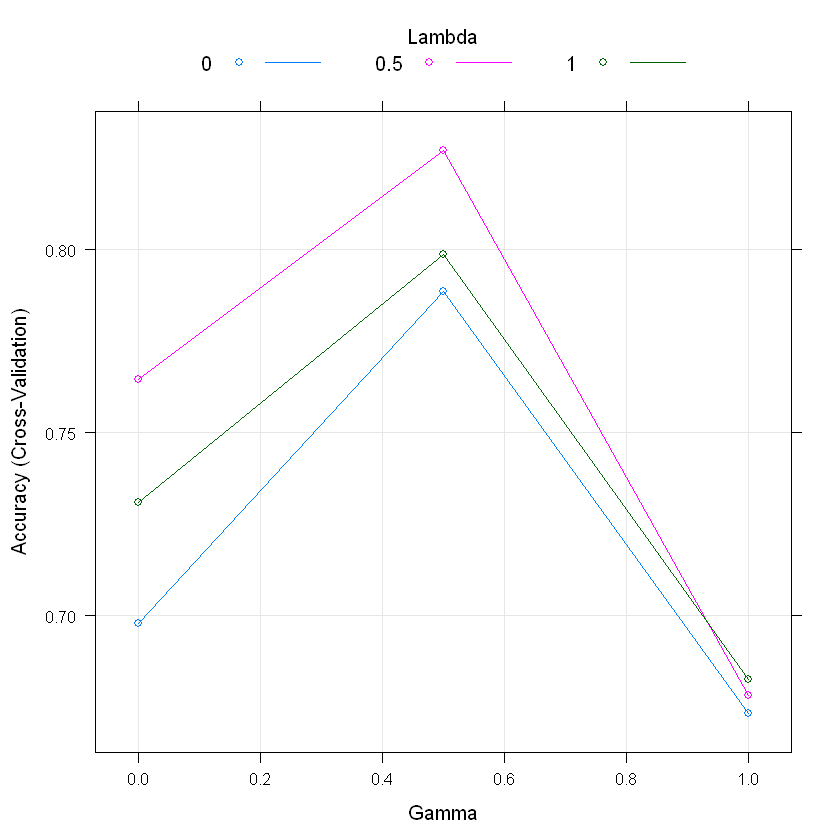

In [ ]:
plot(fit_rda_grid)

# Lab 4: Dimensionality Reduction

There are two main methods for reducing dimensionality - feature selection and feature extraction

In feature selection, we find $k$ of the $p$ dimensions that give us the most information and we discard the other $p-k$ dimensions. The feature selection includes subset selection 

In feature extraction, we find $k$ dimensions that are combination of original $p$ dimensions. This includes principal component analysis, factor analysis, multidimensional scaling, Isometric feature mapping, etc

## Subset Selection

There are $2^p$ possible subsets of $p$ variables. If $p$ is small, the subset of significant variables can be found by an exhaustive search. Otherwise, we employ heuristics to find the subset.

### Forward selection

We start with no variables and add them one by one. At each step, we train our model on the training set and calculate the misclassification rate for the test set. we add the one that has the minimum misclassification rate. We stop if adding any feature does not decrease the misclassification rate, or if the decrease in error is too small.

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)         # for dataset dimension
print(boston.feature_names)      # for feature names
print(boston.target)             # for target variable
print(boston.DESCR)              # for data description

# convert the data to data frame 
import pandas as pd
bos = pd.DataFrame(boston.data, columns = boston.feature_names)
bos['Price'] = boston.target
X = bos.drop("Price", 1)       # feature matrix 
y = bos['Price']               # target feature
bos.head()

#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs = SFS(LinearRegression(),
           k_features=11,
           forward=True,
           floating=False,
           scoring = 'r2',
           cv = 0)
sfs.fit(X, y)
sfs.k_feature_names_     

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 

('CRIM',
 'ZN',
 'CHAS',
 'NOX',
 'RM',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT')

### Backward selection

We start with the full model and delete one variable at a time. At each step, delete the variable that causes the smallest increase in misclassificaiton rate. We stop if removal causes a significant increase in misclassification rate

In [ ]:
#Sequential backward selection(sbs)
sbs = SFS(LinearRegression(), 
          k_features=11, 
          forward=False, 
          floating=False,
          cv=0)
sbs.fit(X, y)
print(sbs.k_feature_names_)

('CRIM', 'ZN', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT')


### Bidirection selection

It is similar to forward selection but the difference is while adding a new feature it also checks the significance of already added features and if it finds any of the already selected features insignificant then it simply removes that particular feature through backward elimination.

In [ ]:
# Sequential Forward Floating Selection(sffs)
sffs = SFS(LinearRegression(), 
          k_features=(3,11), 
          forward=True, 
          floating=True,
          cv=0)
sffs.fit(X, y)
sffs.k_feature_names_

## Principal components analysis

Let $X=\{X_1,...,X_p\}$ be the feature variables. PCA can reduce the dimension $p$ by using the linear combinations of $X_1,...,X_p$. 

The principal component $w_1$ maximizes the variance of the projection $z=w_1^TX$ on the direction $w_1$ with $||w_1||=1$, i.e., 

$$w_1 = argmax_w w^T\Sigma w$$

This is a quadratic optimization problem with a constraint $||w_1||=1$. To solve this problem, we add the Lagrange parameter $\alpha$, 

$$w_1^T\Sigma w_1 + \alpha (w_1^Tw_1-1)$$

Taking the derivative with respect to $w_1$, we have $\Sigma w_1 = \alpha w_1$. It follows that $var(z) = \alpha w_1^Tw_1 = \alpha$. Thus, $w_1$ is the eigenvector with the largest eigenvalue. Similarly, the second component is the eigenvector with the second largest eigenvalue and etc.

The proportion of variance explained by the $k$ components is $$\frac{\lambda_1+...+\lambda_k}{\lambda_1+...+\lambda_k+...+\lambda_p}$$

1. If the learning algorithm is too slow because the input dimension is too high, then using PCA to speed it up is a reasonable choice

2. If memory or disk space is limited, PCA allows you to save space in exchange for losing a little of the data's information. This can be a reasonable tradeoff

The limitations of PCA

1. PCA is not scale invariant. check: we need to scale our data first.

2. The directions with largest variance are assumed to be of the most interest

3. Only considers orthogonal transformations (rotations) of the original variables

4. PCA is only based on the mean vector and covariance matrix. Some distributions (multivariate normal) are characterized by this, but some are not.

5. If the variables are correlated, PCA can achieve dimension reduction. If not, PCA just orders them according to their variances.

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline


url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# loading dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data onto unit scale (mean=0 and variance=1)

In [ ]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values
y = df.loc[:,['target']].values

x = StandardScaler().fit_transform(x)
pd.DataFrame(data = x, columns = features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


We find the first two components for the standardized data

In [ ]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head(5)

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


The proportion of variance explained by the first two components. Together, the first two principal components contain 95.80% of the information

In [ ]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

The clustering analysis is applied to the first two components combined with the target variable

In [ ]:
df[['target']].head()
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


Use a PCA projection to 2d to visualize the entire data set. You should plot different classes using different colors or shapes. Do the classes seem well-separated from each other?

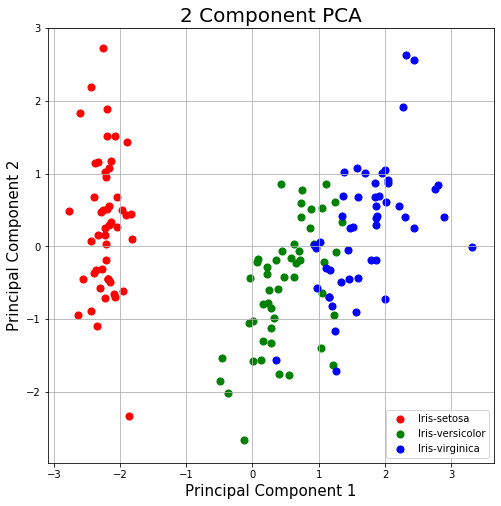

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## Factor Analysis

In factor analysis, we assume that there is a set of unobservable latent factors $z_i: j=1,...,k$ which generate $X$, i.e., 

$$X-\mu = Vz+\epsilon$$

where $V$ is the $p\times k$ matrix of weights, called factor loadings. Without loss of generality, we assume $\mu=0$ and $var(z_j)=1$ and $var(\epsilon_i)=\Psi_i$. Thus, 

$$Cov(X) = VV^T + \Psi$$ 

Given data, $Cov(X)$ is estimated by the sample covariance matrix $S$. We know that $S = CDC^T$ where $C$ are eigenvectors. We select the first $k$ eigenvectors $C_k$

$$V = C_kD_k^{1/2}$$

We can find 

$$\Psi_i = s_i^2-\sum_{j=1}^k V_{ij}^2$$

For any orthogonal matrix $T$ with $TT^T=I$, $V'=VT$ is another solution. 

In orthogonal rotation the factors are still orthogonal after rotation. In oblique rotation, the factors are allowed to become correlated. The factors are rotated to give the maximum loading on as few factors as possible for each variable to make the factors inerpretable. This is for knowledge extraction.

Factor analysis can also be used for dimensionality reduction when $k<p$. In this case, we want to find the factor scores $z_j$ from $x_i$. We want to find the loading $w_{ji}$

$$z_j = \sum_{i=1}^p w_{ji}x_i + \epsilon_i$$

where $x_i$ are centered to have mean 0. It indicates

$$Z = XW + \epsilon$$

Thus, 

$$W = (X^TX)^{-1}X^TZ = S^{-1}V$$

and 

$$Z=XS^{-1}V$$ 

We can use the correlation matrix $R$ instead of $S$ when $X$ are normalized to have unit variance.

Loading data

In [5]:
# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

url = "https://vincentarelbundock.github.io/Rdatasets/csv/psych/bfi.csv"
df = pd.read_csv(url)
df.columns


# Dropping unnecessary columns
df.drop(['Unnamed: 0','gender', 'education', 'age'],axis=1,inplace=True)

# Dropping missing values rows
df.dropna(inplace=True)

df.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis

In [6]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(18146.065577235022, 0.0)

Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. KMO estimates the proportion of variance among all the observed variable. Lower proportion is more suitable for factor analysis. KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.

In [7]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.8486452309468394

For choosing the number of factors, we can use the Kaiser criterion and scree plot. Here 6 eigenvalues are greater than one. It means we need to choose only 6 factors

In [8]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=2, rotation="varimax")
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=2, rotation='varimax',
               rotation_kwargs={}, svd_method='randomized', use_smc=True)

In [9]:
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

In [10]:
fa.loadings_

array([[-0.19765334,  0.09747934],
       [ 0.53141913, -0.00339674],
       [ 0.59661042, -0.0231874 ],
       [ 0.41348182, -0.11472232],
       [ 0.58853195, -0.1445291 ],
       [ 0.34548843, -0.06357922],
       [ 0.35987296, -0.01275361],
       [ 0.28876421, -0.11265749],
       [-0.33088457,  0.30619505],
       [-0.33910665,  0.3617965 ],
       [-0.43670566,  0.05595167],
       [-0.54522605,  0.27057839],
       [ 0.62610913,  0.00816198],
       [ 0.59380572, -0.15746867],
       [ 0.58947736, -0.01813043],
       [-0.05501905,  0.7539983 ],
       [-0.04762412,  0.74058648],
       [-0.03146446,  0.7498676 ],
       [-0.24276789,  0.62138528],
       [-0.08548324,  0.52650791],
       [ 0.37264675, -0.00175912],
       [-0.12986934,  0.14918989],
       [ 0.47446155,  0.02736786],
       [ 0.06793076,  0.2352687 ],
       [-0.19000779,  0.05882625]])

In [11]:
fa.get_communalities()

array([0.04856907, 0.28241783, 0.35648165, 0.18412843, 0.36725852,
       0.12340457, 0.1296712 , 0.09607648, 0.20324001, 0.24589003,
       0.19384242, 0.37048411, 0.39207926, 0.37740161, 0.34781226,
       0.57154054, 0.55073639, 0.56329142, 0.44505592, 0.28451796,
       0.13886869, 0.03912367, 0.22586276, 0.05996595, 0.03956349])

In [12]:
df.values

array([[2., 4., 3., ..., 3., 4., 3.],
       [2., 4., 5., ..., 4., 3., 3.],
       [5., 4., 5., ..., 5., 5., 2.],
       ...,
       [2., 3., 5., ..., 6., 4., 3.],
       [5., 2., 2., ..., 5., 5., 1.],
       [2., 3., 1., ..., 3., 5., 1.]])

In [13]:
fa.transform(df)

array([[-1.23855818, -0.3609032 ],
       [-0.03465481,  0.1516786 ],
       [-0.07183735,  0.49407327],
       ...,
       [ 0.57415068, -0.24588987],
       [-0.29289969,  0.95327634],
       [-2.05957751, -1.57872746]])

The scree plot method draws a straight line for each factor and its eigenvalues. Number eigenvalues greater than one considered as the number of factors.

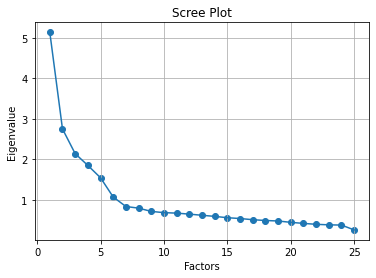

In [14]:
# Create scree plot using matplotlib
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## Multidimensional Scaling

Given the pairwise distance matrix $D = d_{ij}$, MDS is the method for placing the points in a low dimension space such that the distance is as close as possible to $d_{ij}$

Let $D_X$ be the $N\times N$ pairwise distance matrix for a data matrix $X_{N\times p}$, where $N$ is the sample size. We want to find a linear map $W: R^p \rightarrow R^k$ and $Z=WX$ such that the distance matrix $D_Z$ for $Z$ is a good approximation to $D_X$

It can be shown that $B=XX^T$ is a linear function of the distance matrix $D_X$. Thus, approximating $D_X$ is equivalent to approximaing $XX^T$. 

From the spectral decomposition, We know that $X=CD^{1/2}$ can be used as an approximation for $X$ where $C$ is the eigenvector matrix and $D$ is the diagonal matrix of eigenvalues. We have

$$Z=C_kD_k^{1/2}$$

This is the same approximation as that in PCA. Thus, PCA on the correlation matrix is equivalent to the MDS on the standardized Eulclidean distances

If the linear mapping $W$ is replaced by a nonlinear mapping $Z = g(X|\theta)$ called Sammon mapping, we want to find the Sammon mapping $g(X|\theta)$ to minimize the Sammon stress

$$\sum_{r,s}\frac{(||Z^r-Z^s||-||X^r-X^s||)^2}{||X^r-X^s||^2}$$

The Sammon mapping $g(X|\theta)$ can be estimated from regression by minimizing the Sammon stress for the training data.

In the case of classification, we can include class information $L$ (the $N\times N$ loss matrix for misclassification) in the distance matrix by

$$d'_{rs} = (1-\alpha)d_{rs} + \alpha L_{rs}$$



### Find the coordinates of Z from X

In [ ]:
from sklearn.datasets import load_digits
from sklearn.manifold import MDS
X, _ = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [ ]:
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(X[:100])
X_transformed.shape

(100, 2)

### Coordinate Learning from MDS

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

In [4]:
def make_hello(N=1000, rseed=42):
    # Make a plot with "HELLO" text; save as PNG
    fig, ax = plt.subplots(figsize=(4, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
    ax.axis('off')
    ax.text(0.5, 0.4, 'HELLO', va='center', ha='center', weight='bold', size=85)
    fig.savefig('hello.png')
    plt.close(fig)
    
    # Open this PNG and draw random points from it
    from matplotlib.image import imread
    data = imread('hello.png')[::-1, :, 0].T
    rng = np.random.RandomState(rseed)
    X = rng.rand(4 * N, 2)
    i, j = (X * data.shape).astype(int).T
    mask = (data[i, j] < 1)
    X = X[mask]
    X[:, 0] *= (data.shape[0] / data.shape[1])
    X = X[:N]
    return X[np.argsort(X[:, 0])]

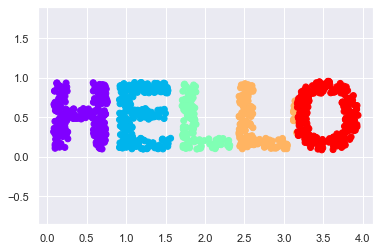

In [5]:
X = make_hello(1000)
colorize = dict(c=X[:, 0], cmap=plt.cm.get_cmap('rainbow', 5))
plt.scatter(X[:, 0], X[:, 1], **colorize)
plt.axis('equal');

The particular choice of x and y values of the dataset are not the most fundamental description of the data: we can scale, shrink, or rotate the data, and the "HELLO" will still be apparent

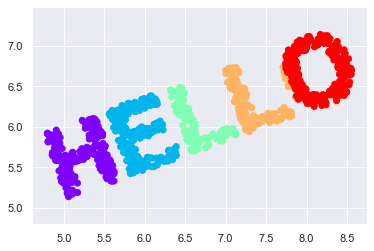

In [6]:
def rotate(X, angle):
    theta = np.deg2rad(angle)
    R = [[np.cos(theta), np.sin(theta)],
         [-np.sin(theta), np.cos(theta)]]
    return np.dot(X, R)
    
X2 = rotate(X, 20) + 5
plt.scatter(X2[:, 0], X2[:, 1], **colorize)
plt.axis('equal');

What is fundamental is the distance between each point and the other points in the dataset

In [7]:
from sklearn.metrics import pairwise_distances
D = pairwise_distances(X)
D.shape

(1000, 1000)

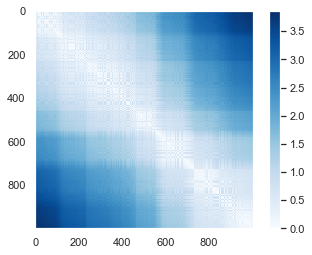

In [8]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

If we similarly construct a distance matrix for our rotated and translated data, we see that it is the same:

In [9]:
D2 = pairwise_distances(X2)
np.allclose(D, D2)

True

Transforming the distances back into x and y coordinates is difficult. This is exactly what the multidimensional scaling algorithm aims to do: given a distance matrix between points, it recovers coordinates

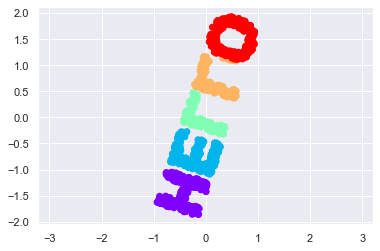

In [10]:
from sklearn.manifold import MDS
model = MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.scatter(out[:, 0], out[:, 1], **colorize)
plt.axis('equal');

### MDS as Manifold Learning

Since distance matrices can be computed from data in any dimension, instead of simply rotating the data "HELLO" in the two-dimensional plane, we can project it into three dimensions using the following function (essentially a three-dimensional generalization of the rotation matrix used earlier):

In [11]:
def random_projection(X, dimension=3, rseed=42):
    assert dimension >= X.shape[1]
    rng = np.random.RandomState(rseed)
    C = rng.randn(dimension, dimension)
    e, V = np.linalg.eigh(np.dot(C, C.T))
    return np.dot(X, V[:X.shape[1]])
    
X3 = random_projection(X, 3)
X3.shape

(1000, 3)

Visualizing the points in 3D

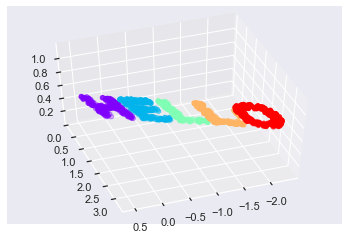

In [12]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(X3[:, 0], X3[:, 1], X3[:, 2],
             **colorize)
ax.view_init(azim=70, elev=50)

We can now ask the MDS estimator to input this three-dimensional data, compute the distance matrix, and then determine the optimal two-dimensional embedding for this distance matrix. The result recovers a representation of the original data

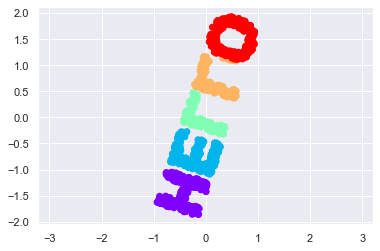

In [13]:
model = MDS(n_components=2, random_state=1)
out3 = model.fit_transform(X3)
plt.scatter(out3[:, 0], out3[:, 1], **colorize)
plt.axis('equal');

### Nonlinear embedding MDS fails

Linear embeddings, which essentially consist of rotations, translations, and scalings of data into higher-dimensional spaces. MDS breaks down is when the embedding is nonlinear — that is, when it goes beyond this simple set of operations. Consider the following embedding, which takes the input and contorts it into an "S" shape in three dimensions:

In [14]:
def make_hello_s_curve(X):
    t = (X[:, 0] - 2) * 0.75 * np.pi
    x = np.sin(t)
    y = X[:, 1]
    z = np.sign(t) * (np.cos(t) - 1)
    return np.vstack((x, y, z)).T

XS = make_hello_s_curve(X)

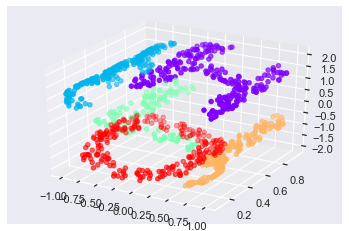

In [36]:
from mpl_toolkits import mplot3d
ax = plt.axes(projection='3d')
ax.scatter3D(XS[:, 0], XS[:, 1], XS[:, 2],
             **colorize);

The fundamental relationships between the data points are still there, but this time the data has been transformed in a nonlinear way: it has been wrapped-up into the shape of an "S."

If we try a simple MDS algorithm on this data, it is not able to "unwrap" this nonlinear embedding, and we lose track of the fundamental relationships in the embedded manifold:

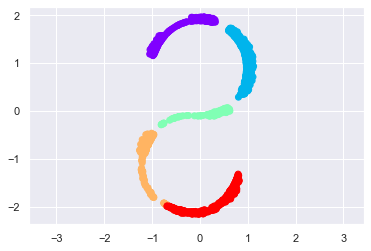

In [16]:
from sklearn.manifold import MDS
model = MDS(n_components=2, random_state=2)
outS = model.fit_transform(XS)
plt.scatter(outS[:, 0], outS[:, 1], **colorize)
plt.axis('equal');

This problem can be solved using local linear embedding (LLE, see below)

## Isomap

Taking a series of pictures as a person slowly rotates hs or her head from right to left, the sequence of faces follows a trajectory that is not linear. Thus, similarity between two faces cannot simplybe written in terms of the sum of the pixel differences and Euclidean distance is not a good metric. The images of two different people with the same pose may have smaller Euclidean distance thn the images of two different poses of the same person.

More reasonable distance is the geodesic distance along the manifold. Isometric feature mapping (Isomap) estimates the geodesic distance and applies multidimensional scaling for dimensionality reduction.

Two nodes $r$ and $s$ are locally connected if $||X^r-X^s||<\epsilon$. We set it as the distance between $X^r$ and $X^s$. For two arbitrary nodes on the manifold, their distance $d_{rs}$ is the shortest length path between them. This distance is called graph distance. 

The graph distance provides a good approximation as the number of points increases, though there is the trade-off of longer execution time. If time is critical, we can subsample and use a subset of points to make the algorithm faster

The parameter $\epsilon$ needs to be carefully tuned; if it is two small there might be more than one connected component and if it is too large, shortcut may be added that corrupt the low-dimensional embedding.

One problem with Isomap is that it does not learn a general mappping function that will allow mapping a new test point; the new point should be added to the data set adn the whole algorithm mst be run once more using $N+1$ points

#### Reconstruct the S shaped HELLO

In [34]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(XS)
print(XS)
proj.shape

C:\Users\liuliang_2\AppData\Roaming\Python\Python37\site-packages\sklearn\manifold\_isomap.py:324: UserWarning: The number of connected components of the neighbors graph is 6 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Python37\lib\site-packages\scipy\sparse\_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Python37\lib\site-packages\scipy\sparse\_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Python37\lib\site-packages\scipy\sparse\_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Python37\lib\site-packages\scipy\sparse\_in

[[ 0.98059953  0.31577315  1.19602185]
 [ 0.9789222   0.66378969  1.20423353]
 [ 0.97834053  0.32361022  1.20700197]
 ...
 [-0.98420695  0.64950893 -1.17702169]
 [-0.98443912  0.3816165  -1.17572598]
 [-0.98921407  0.52569018 -1.14647707]]


(1000, 2)

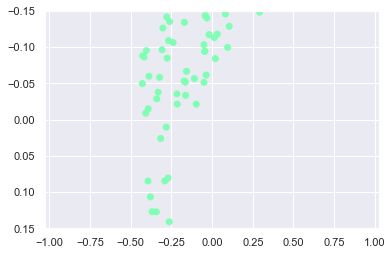

In [35]:
fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

#### Visualizing face data

We apply Isomap on some faces data. Running this command will download the data and cache it in your home directory for later use. We have 2,370 images, each with 2,914 pixels. In other words, the images can be thought of as data points in a 2,914-dimensional space!

In [26]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=40)
faces.data.shape

(153, 2914)

Let's quickly visualize several of these images to see what we're working with:

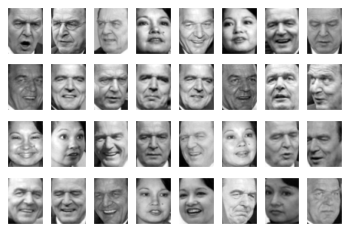

In [27]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='gray')

We would like to plot a low-dimensional embedding of the 2,914-dimensional data to learn the fundamental relationships between the images. One useful way to start is to compute a PCA, and examine the explained variance ratio, which will give us an idea of how many linear features are required to describe the data:

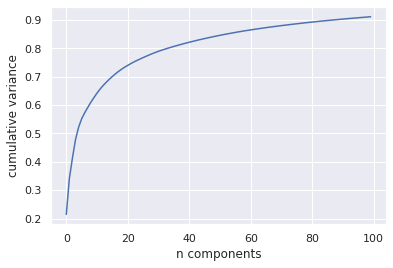

In [ ]:
from sklearn.decomposition import PCA as RandomizedPCA
model = RandomizedPCA(100).fit(faces.data)
plt.plot(np.cumsum(model.explained_variance_ratio_))
plt.xlabel('n components')
plt.ylabel('cumulative variance');

We see that for this data, nearly 100 components are required to preserve 90% of the variance: this tells us that the data is intrinsically very high dimensional—it can't be described linearly with just a few components.

When this is the case, nonlinear manifold embeddings like LLE and Isomap can be helpful. We can compute an Isomap embedding on these faces using the same pattern shown before:

In [ ]:
from sklearn.manifold import Isomap
model = Isomap(n_components=2)
proj = model.fit_transform(faces.data)
proj.shape

(2370, 2)

The output is a two-dimensional projection of all the input images. To get a better idea of what the projection tells us, let's define a function that will output image thumbnails at the locations of the projections:

In [ ]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None,
                    thumb_frac=0.05, cmap='gray'):
    ax = ax or plt.gca()
    
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')
    
    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(images[i], cmap=cmap),
                                      proj[i])
            ax.add_artist(imagebox)

Calling this function now, we see the result:

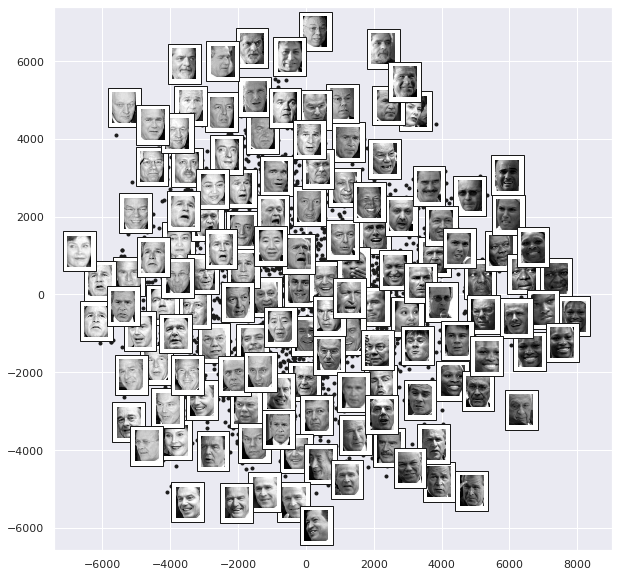

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
plot_components(faces.data,
                model=Isomap(n_components=2),
                images=faces.images[:, ::2, ::2])

The result is interesting: the first two Isomap dimensions seem to describe global image features: the overall darkness or lightness of the image from left to right, and the general orientation of the face from bottom to top. This gives us a nice visual indication of some of the fundamental features in our data.

We could then go on to classify this data (perhaps using manifold features as inputs to the classification algorithm) as we did in In-Depth: Support Vector Machines.

#### Visualizing Structure in Digits

let's take a look at the MNIST handwritten digits set. This data is similar to the digits we saw in In-Depth: Decision Trees and Random Forests, but with many more pixels per image. It can be downloaded from http://mldata.org/ with the Scikit-Learn utility:

In [38]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
mnist.data.shape

This consists of 70,000 images, each with 784 pixels (i.e. the images are 28×28). As before, we can take a look at the first few images:

In [ ]:
fig, ax = plt.subplots(6, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(mnist.data[1250 * i].reshape(28, 28), cmap='gray_r')

Let's compute a manifold learning projection across the data. For speed here, we'll only use 1/30 of the data, which is about ~2000 points (because of the relatively poor scaling of manifold learning, I find that a few thousand samples is a good number to start with for relatively quick exploration before moving to a full calculation):

In [ ]:
# use only 1/30 of the data: full dataset takes a long time!
data = mnist.data[::30]
target = mnist.target[::30]

model = Isomap(n_components=2)
proj = model.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=target, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5);

The resulting scatter plot shows some of the relationships between the data points, but is a bit crowded. We can gain more insight by looking at just a single number at a time:

In [ ]:
from sklearn.manifold import Isomap

# Choose 1/4 of the "1" digits to project
data = mnist.data[mnist.target == 1][::4]

fig, ax = plt.subplots(figsize=(10, 10))
model = Isomap(n_neighbors=5, n_components=2, eigen_solver='dense')
plot_components(data, model, images=data.reshape((-1, 28, 28)),
                ax=ax, thumb_frac=0.05, cmap='gray_r')

The result gives you an idea of the variety of forms that the number "1" can take within the dataset. The data lies along a broad curve in the projected space, which appears to trace the orientation of the digit. As you move up the plot, you find ones that have hats and/or bases, though these are very sparse within the dataset. The projection lets us identify outliers that have data issues: for example, pieces of the neighboring digits that snuck into the extracted images.

Now, this in itself may not be useful for the task of classifying digits, but it does help us get an understanding of the data, and may give us ideas about how to move forward, such as how we might want to preprocess the data before building a classification pipeline.

## Locally Linear Embedding

Each local patch of the manifold can be approximated linearly and given enough data, each point can be written as a linear weighted sum of its neighbors.

Given  $X^r$ and its neighbor $X^s_{(r)}$ in the original space, one can find the reconstruction weights $W_{rs}$ that minimize the error function using least squares subject to $W_{rr}=0$ for all $r$ and $\sum_sW_{rs}=1$

$$\sum_r ||X^r-\sum_s W_{rs}X^s_{(r)}||^2$$

The second step is to keep the weights fixed and find the new coordinates $Z^r$ respecting the interpoint constraints given by the weights, i.e., minimizing the local sum of squared errors

$$\sum_r ||Z^r-\sum_s W_{rs}Z^s_{(r)}||^2$$

Thus, nearby points in the original $p$-dimensional space remain nearby and similarly colocated with respect to one another in the new $k$-dimensional space

The sum of squared errors can be rewritten as $Z^TMZ$, where $M$ is a function of the weight matrix $W$ and it is sparse (a small proportion of data points are neighbors), symmetric, and positive semidefinite. 

We assume that the new coordinates $Z$ are centered at the origin $E(Z)=0$ and are uncorrelated with unit length $Cov(z)=I$. The solution is given by the $k+1$ engenvectors with the smallest eigenvalues. Then we ignore the lowest one and the other $k$ eigenvectors give us the new coordinates.

The $n$ neighbors span a space of dimensionality $n-1$. LLE can reduce dimensionality up to $k\le n-1$. Some margin between $k$ and $n$ is necessary to obtain a good embedding. If $n$ (i.e., $\epsilon$) is small, the graph may no longer connected. If $n$ is large, some neighbors may be too far for the local linearity assumption to hold.

LLE solution is the set of new coordinates, but we do not learn a mappping from the original space to the new space and hence cannot find $z'$ for a new $x'$. To find the new coordinate of $x'$, we can first find the weights $w_s$ for the neighborhood of $x'$ and then use the weights $w_s$ to calculate the new coordinates $z'$ from the new coordinates $Z^s$ of the neighbors $X^s$ of $x'$

$$z' = \sum_s w_sZ^s$$

Alternatively, we can use the original data ${X^t,Z^t}_1^N$ as a training set, and we train a regressor $g(X^t|\theta)$ to approximate $Z^t$ from $X$ by minimizing the regression error with respect to $\theta$

$$\sum_t ||Z^t - g(X^t|\theta)||^2$$

Then we can caculate 

$$z'=g(x'|\theta)$$





#### LLE for the S shaped "HELLO"

Previously, we saw that linear embedding methods MDS fail when the input "HELLO" is contorted into an "S" shape in three dimensions. But LLE captures the local structure of HELLO and is able to unroll the S-shaped input in a way that keeps the local structure approximately the same.

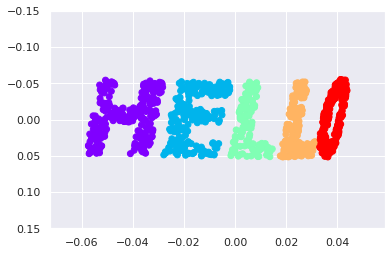

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
model = LocallyLinearEmbedding(n_neighbors=100, n_components=2, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(XS)

fig, ax = plt.subplots()
ax.scatter(out[:, 0], out[:, 1], **colorize)
ax.set_ylim(0.15, -0.15);

The result remains somewhat distorted compared to our original manifold, but captures the essential relationships in the data!

# Lab 5: Clustering

Let $C_i: i=1,...,k$ be $k$ classes and $P(x|C_i)$ be the probability density function of a data point $x$ given the class $C_i$. Let $P(C_i)$ be the probability of the class $C_i$. The marginal density is

$$P(x) = \sum_i P(X|C_i)P(C_i)$$

In the supervised cases, where the $k$ classes are given, the density function and the probability of the class $C_i$ can be estimated from the training set. 

This chapter focuses on the unsupervised learning problem where the labels are not given and we will discuss two algorithms - k-means clustering and Expectation-Maximization algorithm

## k-means clustering

Given k, the k-means algorithm includes two major steps. In step 1, given k means $\{m_i\}$, a data point $x$ is assigned to class $i$ if 

$$||x-m_i|| = min_j||x-m_j||$$

In step 2, given the assignments we update the k means $\{m_i\}$ by the average of the assigned data points for class $C_i$. We iteratively update the assignments and k means until they converge. 

The k-means algorithm highly depend on the initial $m_i$. To overcome this problem we may

1. take random numbers as the initial $m_i$
2. calculate the overall mean and small random vectors may be added to the overall mean to get the k initial $m_i$
3. calculate the PCA and devide its range into k equal intervals partitioning the data into k groups

### K-means algorithm for clustering points

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

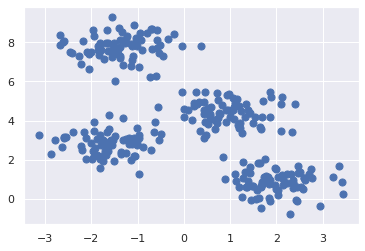

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

By eye, it is relatively easy to pick out the four clusters. The k-means algorithm does this automatically, and in Scikit-Learn uses the typical estimator API:

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

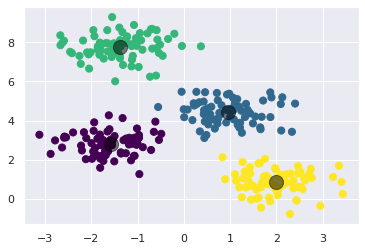

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

### k-means on digits

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

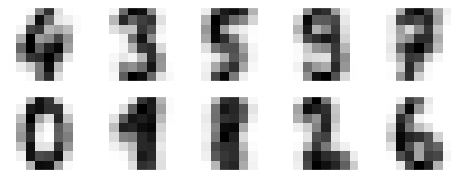

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

We see that even without the labels, KMeans is able to find clusters whose centers are recognizable digits, with perhaps the exception of 1 and 8.

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

Let's check the confusion matrix

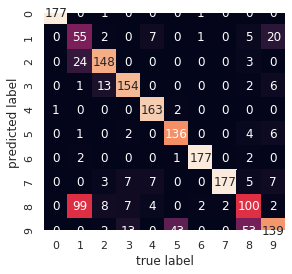

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Expectation-Maximization algorithm

Given the density function $P(x|C_i)$ and the class probability $P(C_i)$, the loglikelihood is given by

$$\sum_tlog\big{\{}\sum_{i=1}^kP(x^t|C_i)P(C_i)\big{\}}$$

It is difficult to find the maximum likelihood estimate of the k classes. We use the expectation-maximization algorithm to find the MLE in which the latent variable is an indicator variable of the assignments of a data point. 

Thus, in the expectation step, the expectation of the latent variable is the posterior probability $P(C_i|x)$.

In the maximization step, the model parameters for class $C_i$ are estimated using ML and the probablity $P(C_i)$ of class $i$ is estimated by the proportion of data points in the class $C_i$. 

#### GMM for clustering

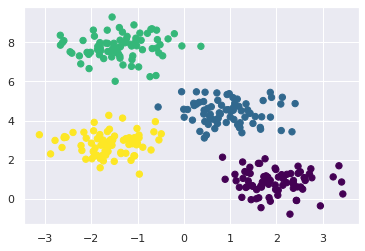

In [ ]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

In [ ]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.972 0.026 0.    0.002]
 [0.    0.    1.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    1.    0.   ]
 [0.999 0.001 0.    0.   ]]


Plot points, making the size of each point proportional to the certainty of its prediction

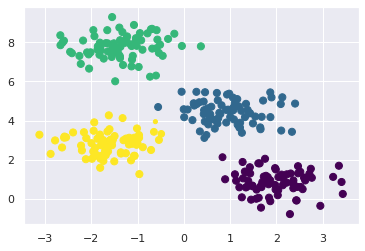

In [ ]:
size = 50 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size);

## Mixture of Latent Variable Models

We look for latent variables that generate the data in the clusters, i.e.,

$$P(X^t|C_i) = Normal(m_i, V_iV_i^T+\Psi_i)$$

where $V_i$ and $\Psi_i$ are factor loadings and specific variances of cluster $C_i$. This can be extended to mixture models to find mixtures of factor analyzers. The EM algorithm can be updated accordingly to find $V$ and $\Psi$.

## Supervised learning after clustering

Clustering like the dimensionality reduction methods can be used for data exploration or to understand the structure of data by grouping instances based on their similarities.

If such groups are found we can choose the group mean as the representative prototype of instances in the group or possible range. This allows a simpler description of the data. 

In the case of classification, when each class is a mixture model composed of a number of components, the whole density is a miture of mixtures. Learning parameters of components is done separately for each class.

## Hierarchical clustering

The aim is to find groups such that observations in a group are more similar to each other than obervations in different groups. Similarity is measured by a distance function.

An agglomerative clustering algorithm starts with N groups each containing one training observation, merging similar groups to form larger groups until there is a single group

A divisive clustering algorithm starts with a single group and divide large groups into smaller groups until each group contains a single observation.

#### Clustering digits

In [ ]:
# Authors: Gael Varoquaux
# License: BSD 3 clause (C) INRIA 2014

print(__doc__)
from time import time

import numpy as np
from scipy import ndimage
from matplotlib import pyplot as plt

from sklearn import manifold, datasets

X, y = datasets.load_digits(return_X_y=True)
n_samples, n_features = X.shape

np.random.seed(0)

def nudge_images(X, y):
    # Having a larger dataset shows more clearly the behavior of the
    # methods, but we multiply the size of the dataset only by 2, as the
    # cost of the hierarchical clustering methods are strongly
    # super-linear in n_samples
    shift = lambda x: ndimage.shift(x.reshape((8, 8)),
                                  .3 * np.random.normal(size=2),
                                  mode='constant',
                                  ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y


X, y = nudge_images(X, y)

Automatically created module for IPython interactive environment


Visualize the clustering

(3594, 64)


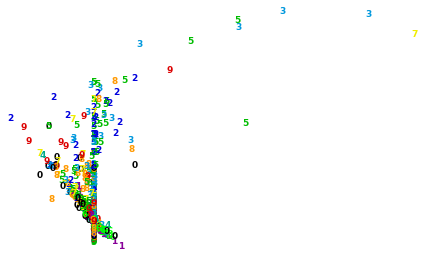

In [ ]:
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(X_red[i, 0], X_red[i, 1], str(y[i]),
                 color=plt.cm.nipy_spectral(labels[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])


print(X.shape)
plot_clustering(X, y)

Computing embedding

Computing embedding
Done.


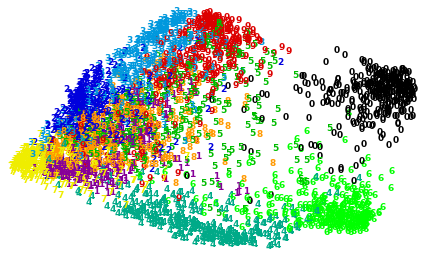

In [ ]:
#----------------------------------------------------------------------
# 2D embedding of the digits dataset
print("")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
plot_clustering(X_red, y)

Hierarchical clustering

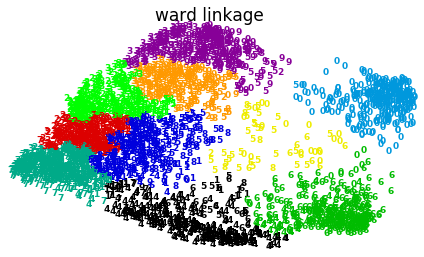

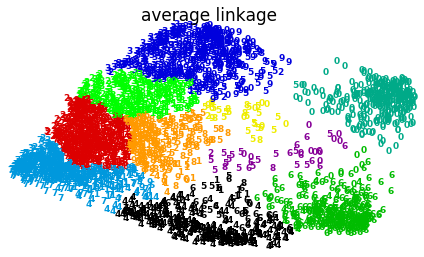

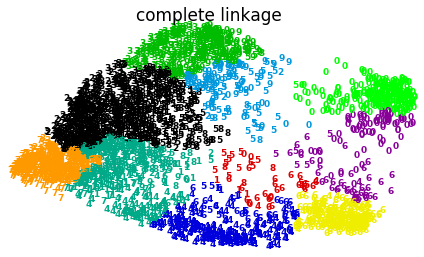

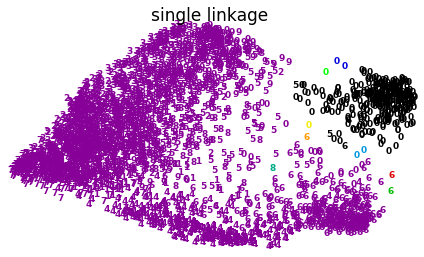

In [ ]:
from sklearn.cluster import AgglomerativeClustering

for linkage in ('ward', 'average', 'complete', 'single'):
    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
    #t0 = time()
    clustering.fit(X_red)
    #print("%s :\t%.2fs" % (linkage, time() - t0))
    plot_clustering(X_red, clustering.labels_, "%s linkage" % linkage)



## Choosing k the number of clusters

In some applications, k is defined by the application

Plotting the data in two dimensions using PCA may be used in uncovering the number of clusters

Setting a maximum allowed distance may help to find k

We can plot the reconstruction error or loglikelihood as a function of k and look for the elbow (cross validation)

### Silhouette analysis

Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

In this example the silhouette analysis is used to choose an optimal value for n_clusters. The silhouette plot shows that the n_clusters value of 3, 5 and 6 are a bad pick for the given data due to the presence of clusters with below average silhouette scores and also due to wide fluctuations in the size of the silhouette plots. Silhouette analysis is more ambivalent in deciding between 2 and 4.

Also from the thickness of the silhouette plot the cluster size can be visualized. The silhouette plot for cluster 0 when n_clusters is equal to 2, is bigger in size owing to the grouping of the 3 sub clusters into one big cluster. However when the n_clusters is equal to 4, all the plots are more or less of similar thickness and hence are of similar sizes as can be also verified from the labelled scatter plot on the right.

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083261
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


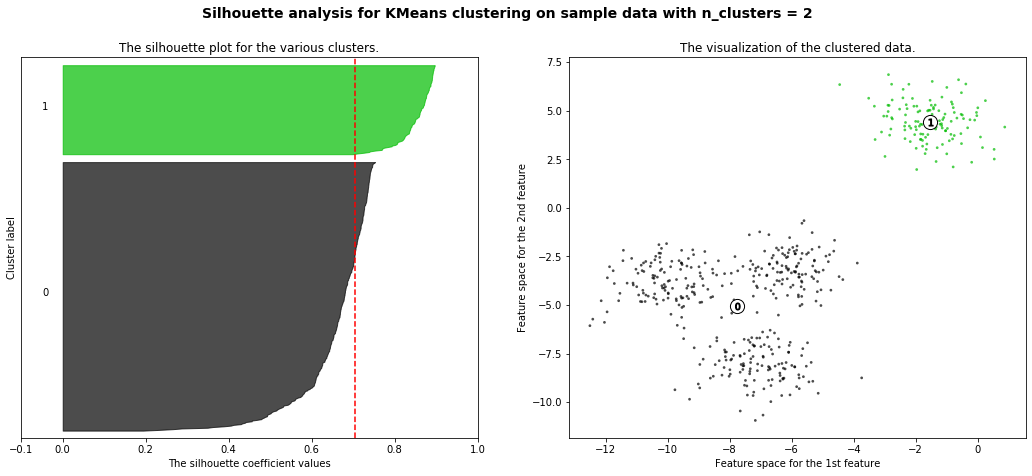

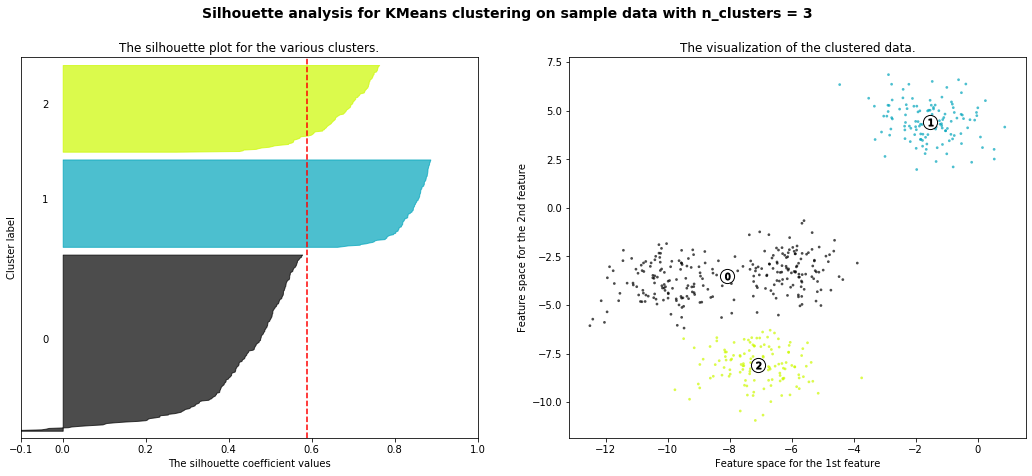

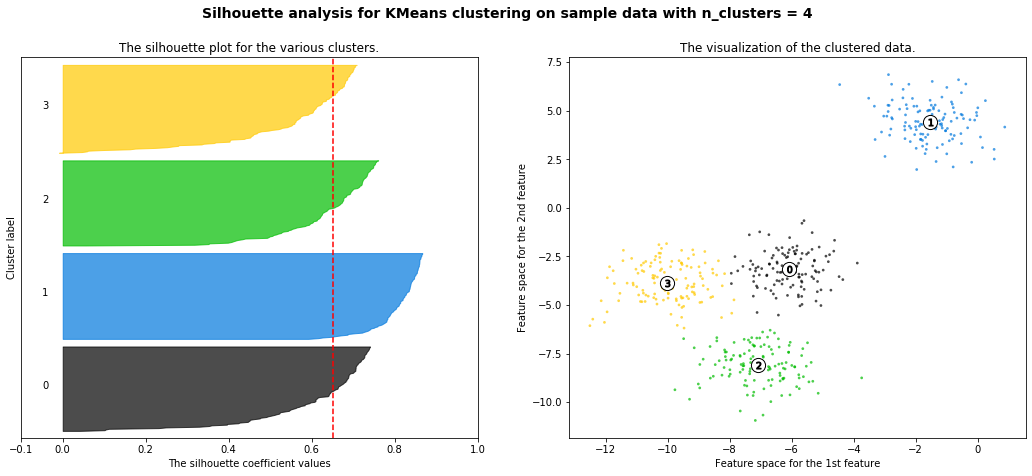

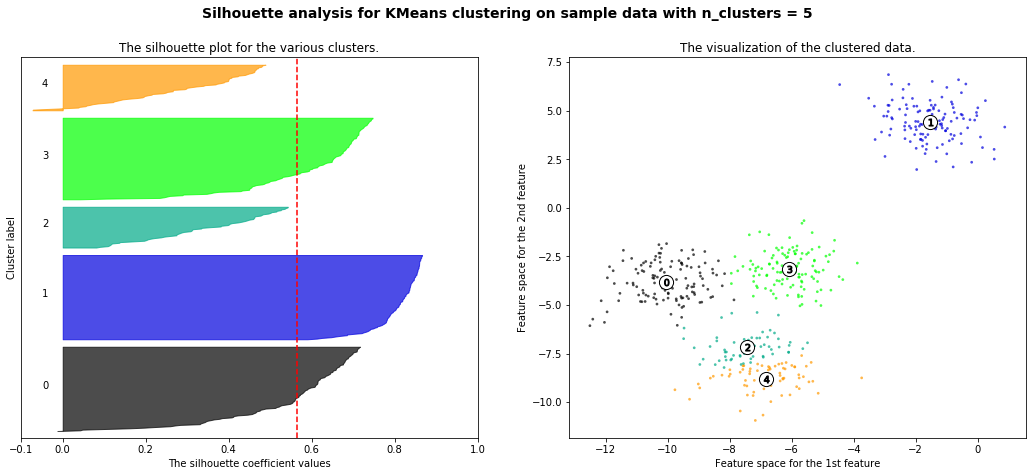

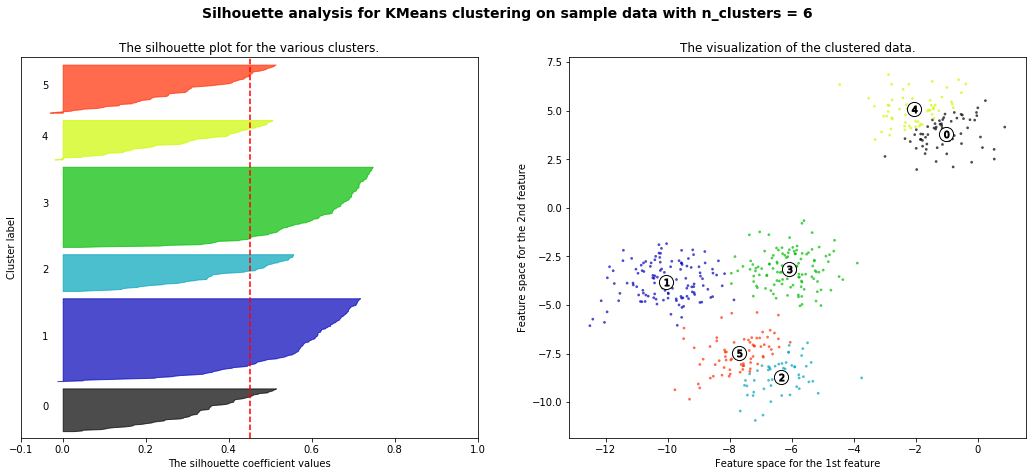

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Lab 6: Nonparametric Methods

In nonparametric estimation, we assume that similar inputs have similar outputs. Therefore, the nonparametric algorithm is composed of finding the similar past instances from teh training set using a suitable distance measure and interpolating from them to find the right output.

## Nonparametric density estimation

Given the sample $X$ in the training set, the cumulative distribution function can be estimated by 

$$\hat{F}(x) = \frac{\# \{x^t \le x\}}{N}$$

Let $h$ be the length of the interval and the instances that fall in this interval are assumed to be close enough. The density can be estimated by

$$\hat{p}(x) = \frac{1}{h}\big{[}\frac{\# \{x^t \le x+h\}-\#\{x^t\le x\}}{N}\big{]}$$

### Histogram estimator

The input space is divided into equal-sized intervals called bins $\{B_i: i=1,...,k\}$. The histogram estimator for $p(x)$ is given by 

$$\hat{p}(x) = \frac{\# \{x^t\in B_x \}}{Nh}$$

where $B_x$ is the bin that $x$ falls in. In the Naive estimator, the Bin $B_x$ is replaced by the interval $[x-h/2, x+h/2]$ and the estimator is given by 

$$\hat{p}(x) = \frac{\# \{-h/2 < x^t < x+h/2\}}{Nh}$$

or 

$$\hat{p}(x) = \frac{1}{Nh}\sum_{t=1}^Nw\big{(}\frac{x-x^t}{h}\big{)}$$

where $w$ is the weight function defined as $w(u) = 1$ if $|u|<1/2$ and 0 otherwise. Since the weight function is hard (0/1) the estimate is not continuous.

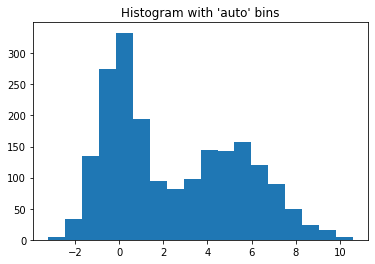

In [ ]:
import matplotlib.pyplot as plt
rng = np.random.RandomState(10)  # deterministic random data
a = np.hstack((rng.normal(size=1000), rng.normal(loc=5, scale=2, size=1000)))
plt.hist(a, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
plt.show()

### Kernel estimator

The weights in the naive estimator is replaced by a probability distribution $k(x^t|h,x)$ called kernel. Typically, the kernel is symmetric about $x$ and truncated by the interval $[x-3h, x+3h]$, i.e., 

$$\hat{p}(x) = \frac{1}{Nh}\sum_{t=1}^Nk\big{(}\frac{x-x^t}{h}\big{)}$$

If $h$ is small, each training instance has a large effect in a small region and no effect on distant points. When $h$ is large, there is more overlap of the kernels and we get a smoother estimate. 


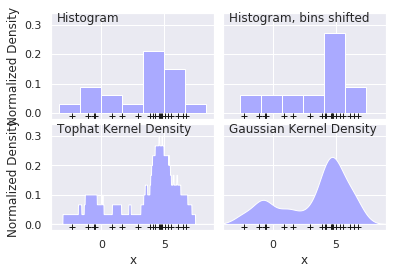

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from distutils.version import LooseVersion
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

# `normed` is being deprecated in favor of `density` in histograms
if LooseVersion(matplotlib.__version__) >= '2.1':
    density_param = {'density': True}
else:
    density_param = {'normed': True}

# ----------------------------------------------------------------------
# Plot the progression of histograms to kernels
np.random.seed(1)
N = 20
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.05, wspace=0.05)

# histogram 1
ax[0, 0].hist(X[:, 0], bins=bins, fc='#AAAAFF', **density_param)
ax[0, 0].text(-3.5, 0.31, "Histogram")

# histogram 2
ax[0, 1].hist(X[:, 0], bins=bins + 0.75, fc='#AAAAFF', **density_param)
ax[0, 1].text(-3.5, 0.31, "Histogram, bins shifted")

# tophat KDE
kde = KernelDensity(kernel='tophat', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 0].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 0].text(-3.5, 0.31, "Tophat Kernel Density")

# Gaussian KDE
kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X)
log_dens = kde.score_samples(X_plot)
ax[1, 1].fill(X_plot[:, 0], np.exp(log_dens), fc='#AAAAFF')
ax[1, 1].text(-3.5, 0.31, "Gaussian Kernel Density")

for axi in ax.ravel():
    axi.plot(X[:, 0], np.full(X.shape[0], -0.01), '+k')
    axi.set_xlim(-4, 9)
    axi.set_ylim(-0.02, 0.34)

for axi in ax[:, 0]:
    axi.set_ylabel('Normalized Density')

for axi in ax[1, :]:
    axi.set_xlabel('x')


#### Plot all available kernels

Text(0.5, 1.0, 'Available Kernels')

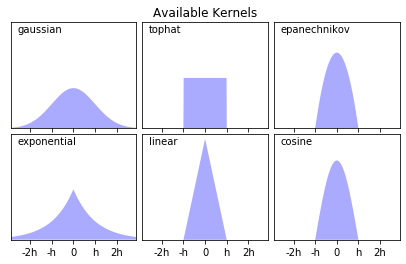

In [ ]:
X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return '0'
    elif x == 1:
        return 'h'
    elif x == -1:
        return '-h'
    else:
        return '%ih' % x

for i, kernel in enumerate(['gaussian', 'tophat', 'epanechnikov',
                            'exponential', 'linear', 'cosine']):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), '-k', fc='#AAAAFF')
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title('Available Kernels')

#### Plot a 1D density 

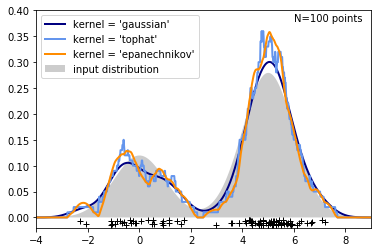

In [ ]:
N = 100
np.random.seed(1)
X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),
                    np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0])
             + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))

fig, ax = plt.subplots()
ax.fill(X_plot[:, 0], true_dens, fc='black', alpha=0.2,
        label='input distribution')
colors = ['navy', 'cornflowerblue', 'darkorange']
kernels = ['gaussian', 'tophat', 'epanechnikov']
lw = 2

for color, kernel in zip(colors, kernels):
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(X)
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), color=color, lw=lw,
            linestyle='-', label="kernel = '{0}'".format(kernel))

ax.text(6, 0.38, "N={0} points".format(N))

ax.legend(loc='upper left')
ax.plot(X[:, 0], -0.005 - 0.01 * np.random.random(X.shape[0]), '+k')

ax.set_xlim(-4, 9)
ax.set_ylim(-0.02, 0.4)
plt.show()

#### KDE on a sphere

In [ ]:
import numpy as np
from sklearn.datasets import fetch_species_distributions

data = fetch_species_distributions()

# Get matrices/arrays of species IDs and locations
latlon = np.vstack([data.train['dd lat'],
                    data.train['dd long']]).T
species = np.array([d.decode('ascii').startswith('micro')
                    for d in data.train['species']], dtype='int')

In [ ]:
from mpl_toolkits.basemap import Basemap
from sklearn.datasets.species_distributions import construct_grids

xgrid, ygrid = construct_grids(data)



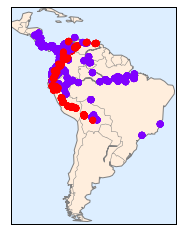

In [ ]:
# plot coastlines with basemap
m = Basemap(projection='cyl', resolution='c',
            llcrnrlat=ygrid.min(), urcrnrlat=ygrid.max(),
            llcrnrlon=xgrid.min(), urcrnrlon=xgrid.max())

m.drawmapboundary(fill_color='#DDEEFF')
m.fillcontinents(color='#FFEEDD')
m.drawcoastlines(color='gray', zorder=2)
m.drawcountries(color='gray', zorder=2)

# plot locations
m.scatter(latlon[:, 1], latlon[:, 0], zorder=3,
          c=species, cmap='rainbow', latlon=True);

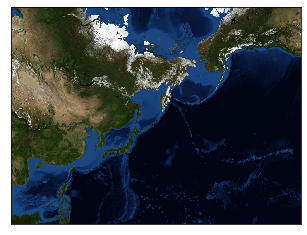

In [ ]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
# setup Lambert Conformal basemap.
# set resolution=None to skip processing of boundary datasets.
m = Basemap(width=12000000,height=9000000,projection='lcc',
            resolution=None,lat_1=45.,lat_2=55,lat_0=50,lon_0=-207.)
m.bluemarble()
plt.show()

 - computing KDE in spherical coordinates
 - plot coastlines using basemap
 - computing KDE in spherical coordinates
 - plot coastlines using basemap


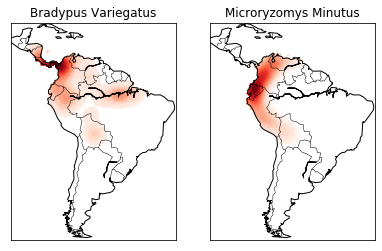

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_species_distributions
from sklearn.neighbors import KernelDensity

# if basemap is available, we'll use it.
# otherwise, we'll improvise later...
try:
    from mpl_toolkits.basemap import Basemap
    basemap = True
except ImportError:
    basemap = False


def construct_grids(batch):
    """Construct the map grid from the batch object

    Parameters
    ----------
    batch : Batch object
        The object returned by :func:`fetch_species_distributions`

    Returns
    -------
    (xgrid, ygrid) : 1-D arrays
        The grid corresponding to the values in batch.coverages
    """
    # x,y coordinates for corner cells
    xmin = batch.x_left_lower_corner + batch.grid_size
    xmax = xmin + (batch.Nx * batch.grid_size)
    ymin = batch.y_left_lower_corner + batch.grid_size
    ymax = ymin + (batch.Ny * batch.grid_size)

    # x coordinates of the grid cells
    xgrid = np.arange(xmin, xmax, batch.grid_size)
    # y coordinates of the grid cells
    ygrid = np.arange(ymin, ymax, batch.grid_size)

    return (xgrid, ygrid)


# Get matrices/arrays of species IDs and locations
data = fetch_species_distributions()
species_names = ['Bradypus Variegatus', 'Microryzomys Minutus']

Xtrain = np.vstack([data['train']['dd lat'],
                    data['train']['dd long']]).T
ytrain = np.array([d.decode('ascii').startswith('micro')
                  for d in data['train']['species']], dtype='int')
Xtrain *= np.pi / 180.  # Convert lat/long to radians

# Set up the data grid for the contour plot
xgrid, ygrid = construct_grids(data)
X, Y = np.meshgrid(xgrid[::5], ygrid[::5][::-1])
land_reference = data.coverages[6][::5, ::5]
land_mask = (land_reference > -9999).ravel()

xy = np.vstack([Y.ravel(), X.ravel()]).T
xy = xy[land_mask]
xy *= np.pi / 180.

# Plot map of South America with distributions of each species
fig = plt.figure()
fig.subplots_adjust(left=0.05, right=0.95, wspace=0.05)

for i in range(2):
    plt.subplot(1, 2, i + 1)

    # construct a kernel density estimate of the distribution
    print(" - computing KDE in spherical coordinates")
    kde = KernelDensity(bandwidth=0.04, metric='haversine',
                        kernel='gaussian', algorithm='ball_tree')
    kde.fit(Xtrain[ytrain == i])

    # evaluate only on the land: -9999 indicates ocean
    Z = np.full(land_mask.shape[0], -9999, dtype='int')
    Z[land_mask] = np.exp(kde.score_samples(xy))
    Z = Z.reshape(X.shape)

    # plot contours of the density
    levels = np.linspace(0, Z.max(), 25)
    plt.contourf(X, Y, Z, levels=levels, cmap=plt.cm.Reds)

    if basemap:
        print(" - plot coastlines using basemap")
        m = Basemap(projection='cyl', llcrnrlat=Y.min(),
                    urcrnrlat=Y.max(), llcrnrlon=X.min(),
                    urcrnrlon=X.max(), resolution='c')
        m.drawcoastlines()
        m.drawcountries()
    else:
        print(" - plot coastlines from coverage")
        plt.contour(X, Y, land_reference,
                    levels=[-9998], colors="k",
                    linestyles="solid")
        plt.xticks([])
        plt.yticks([])

    plt.title(species_names[i])

plt.show()

### k-nearest neighbor estimator

Let $d_k(x)$ be the minimum radius of an open ball of $x$ that covers $k$ points. The k-nearest neighbor density estimate is given by

$$\hat{p}(x) = \frac{k}{2Nd_k(x)}$$

The knn estimator's derivative has a discontinuity at all $1/2(x^j+x^{j+k})$. To get a smoother estimator we can use a kernel function

$$\hat{p}(x) = \frac{1}{Nd_k(x)}\sum_{t=1}^Nk\big{(}\frac{x-x^t}{d_k(x)}\big{)}$$

This is a kernel estimator with adaptive smoothing parameter $h=d_k(x)$. $k(.)$ is taken to be the Gaussian kernel.

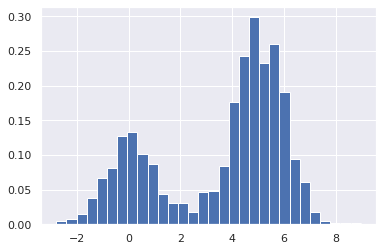

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

x = make_data(1000)

hist = plt.hist(x, bins=30, density=True)

In [ ]:
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
(density * widths).sum()

1.0

### Density estimation for multivariate data

Given a sample of $p$-dimensional obvservations $X=\{x^t\}_{t=1}^N$, the multivariate kernel density estimator is 

$$\hat{p}(x) = \frac{1}{Nh^p}\sum_{t=1}^N K\big{(}\frac{x-x^t}{h}\big{)}$$

The kernel is taken to be the multivariate Gaussian kernel

$$K(u) = \big{(}\frac{1}{\sqrt{2\pi}}\big{)}^pexp\big{[}-\frac{||u||^2}{2}\big{]}$$

or 

$$K(u) = \frac{1}{(2\pi)^{p/2}|S|^{1/2}}exp\big{[}-\frac{1}{2}u^TS^{-1}u\big{]}$$

where $S$ is the sample covariance matrix. It is also possible to calculate the local $S$ from instances in the vicinity of $x$. If the local $S$ is singular then PCA may be needed

If the inputs are discrete, we can use Hamming distance, which counts the number of nomatching attributes.

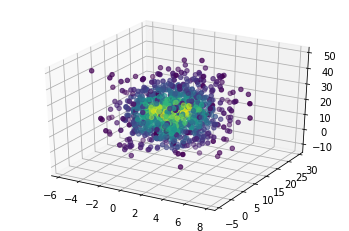

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

mu=np.array([1,10,20])
sigma=np.matrix([[4,1,1],[1,25,1],[1,1,100]])
data=np.random.multivariate_normal(mu,sigma,1000)
values = data.T
kde1 = stats.gaussian_kde(values)
density = kde1(values)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
x, y, z = values
ax.scatter(x, y, z, c=density)
plt.show()

## Nonparametric classification

The kernel estimator of the class-conditional density $P(x|C_i)$ is given by

$$\hat{p}(x) = \frac{1}{N_ih^p}\sum_{t=1}^N K\big{(}\frac{x-x^t}{h}\big{)}r_i^t$$

where $r_i^t$ is an indicator of the assignment of $x$, i.e., $r_i^t=1$ if $x\in C_i$ and $r_i^t=0$ otherwise. The MLE of the prior density is $\hat{P}(C_i) = N_i/N$. Thus the discriminant function is given by

$$g_i(x) = \hat{P}(x|C_i)\hat{P}(C_i)=\frac{1}{Nh^p}\sum_{t=1}^N K\big{(}\frac{x-x^t}{h}\big{)}r_i^t$$

For the knn estimator, we have

$$\hat{p}(x) = \frac{k_i}{2N_iV^k(x)}$$

where $k_i$ is the number of the k nearest neighbors that belong to the class $C_i$. Then the posterior probablity of the class $C_i$ is

$$\hat{P}(C_i|x) = \frac{k_i}{k}$$

## Nonparametric regression: smoothing models

In regression, given the training set $X=\{x^t,r^t\}$ where $r^t\in R$, we assume

$$r^t = g(x^t)+\epsilon$$

We assume that $g(.)$ is a smooth function. In nonparametric regrssion, we will estimate the function $g(x)$ locally by the nearby points of $x$

### Running mean smoother

The function $g(x)$ is estimated by the moving average

$$\hat{g}(x) = \frac{\sum_{t=1}^Nw\big{(}\frac{x-x^t}{h}\big{)}r^t}{\sum_{t=1}^{N}w\big{(}\frac{x-x^t}{h}\big{)}}$$

where $w(u)$ is an indicator function whether the point $x^t$ is in the neighborhood of $x$, i.e., $w(u) = 1$ if $|u|<1$ and 0 otherwise.

            Births
Date              
1959-01-01      35
1959-01-02      32
1959-01-03      30
1959-01-04      31
1959-01-05      44


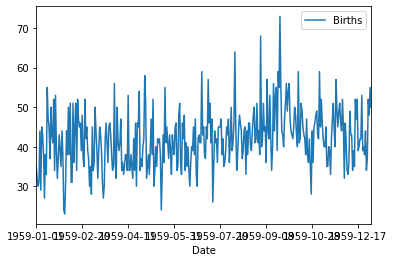

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('~/Dropbox/Machine Learning/daily-total-female-births.txt', header=0, index_col=0)
print(series.head())
series.plot()
pyplot.show()

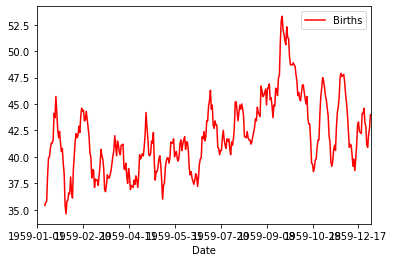

In [ ]:
# Tail-rolling average transform
rolling = series.rolling(window=10)
rolling_mean = rolling.mean()
#print(rolling_mean.head(50))
# plot original and transformed dataset
rolling_mean.plot(color='red')
pyplot.show()

### Kernel smoother

The function $g(x)$ is estimated by the moving average

$$\hat{g}(x) = \frac{\sum_{t=1}^NK\big{(}\frac{x-x^t}{h}\big{)}r^t}{\sum_{t=1}^{N}K\big{(}\frac{x-x^t}{h}\big{)}}$$

Typically a Gaussian kernel $K(.)$ is used. Alternatively, instead of fixing $h$, we can fix the number of neighbors and getting the knn smoother.                                                                                        

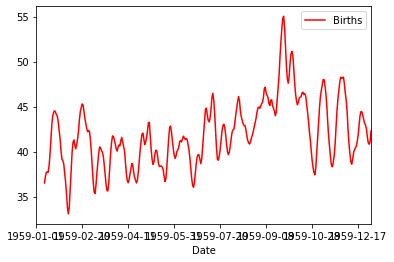

In [ ]:
rolling = series.rolling(10, win_type='triang')
rolling_mean = rolling.mean()
rolling_mean.plot(color='red')
pyplot.show()

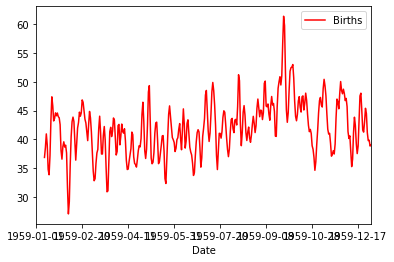

In [ ]:
rolling = series.rolling(10, win_type='gaussian')
rolling_mean = rolling.mean(std=1)
rolling_mean.plot(color='red')
pyplot.show()

### Running line smoother

Instead of taking an average, we can fit a local linear regression line using the neighbors of $x$ and then estimate $g(x)$ from the regression line. 

In the locally weighted running line smoother (loess), instead of a hard definition of neighborhoods, we use kernel weighting such that distant points have less effect on error. 

In [ ]:
# excersize
    


## How to choose the smoothing parameter

In nonparametric methods, choosing the correct smoothing parameters are important in oversmoothing or undersmoothing problems.

A regularized cost function as used in smoothing splines

$$\sum_t \big{[}r^t -\hat{g}(x^t) \big{]}^2 + \lambda \int_a^b[\hat{g}''(x)]^2dx$$

The first term is the error of fit. The second term $\hat{g}''(x)$ is the curvature of the estimated function $\hat{g}(x)$.

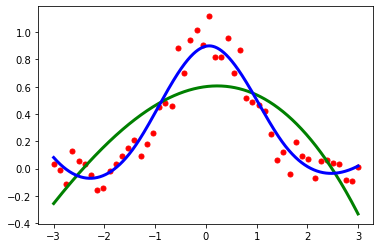

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
x = np.linspace(-3, 3, 50)
y = np.exp(-x**2) + 0.1 * np.random.randn(50)
plt.plot(x, y, 'ro', ms=5)

spl = UnivariateSpline(x, y)
xs = np.linspace(-3, 3, 1000)
plt.plot(xs, spl(xs), 'g', lw=3)

spl.set_smoothing_factor(0.5)
plt.plot(xs, spl(xs), 'b', lw=3)
plt.show()

# Lab 7: Decision Trees

## Univariate trees

In an univariate tree, in each internal node, the test uses only one of the input dimensions $x = \{x_1,...,x_p\}$. 

If the used input dimension $x_j$ is discrete, taking one of n possible values. The decision node checks the value of $x_j$ and takes the corresponding branch, implementing an n-way split. 

If $x_j$ s numeric, the test is a comparison $f_m(x): x_j > w_{m0}$ where $w_{m0}$ is a suitably chosen threshold value.

## Classification trees

In a classification tree, the goodness of a split is quantified by an impurity measure. A split is pure if after split, for all branches, all instances choosing a branch belong to te same classes.

Let $N_m$ be the number of training instances reaching node $m$ and $N_m^i$ is the number of instances belonging to the class $C_i$. The probability of class $C_i$ in node $m$ is $\frac{N_m^i}{N_m}$

The total impurity after the split is measured by the entropy

$$-\sum_{j=1}^{n}\bigg{[} \frac{N_{mj}}{N_m}\sum_{i=1}^kp^i_{mj}log_2p^i_{mj}\bigg{]}$$

In the case of a numeric attribute, we also need to know the threshold $w_{m0}$ in order to calculate the entropy. For all attributes and for all split positions, we calculate the impurity and choose the one that has the minimum entropy. The tree construction continues recursively and in parallel for all branches that are not pure until all are pure. this is called classification and regression trees algorithm (CART)

When there is noise, growing the tree until it is purest, we may grow a very large tree adn it overfits. To alleviate such overfitting, tree construction ends when nodes become pure enought ($<\theta$).

The parameter $\theta$ is the complexity parameter. When it is small, the variance is high and the tree grows large.

[Text(167.4, 199.32, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(141.64615384615385, 163.07999999999998, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(193.15384615384616, 163.07999999999998, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(103.01538461538462, 126.83999999999999, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(51.50769230769231, 90.6, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(25.753846153846155, 54.359999999999985, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(77.26153846153846, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(154.52307692307693, 90.6, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(128.76923076923077, 54.359999999999985, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(180.27692307692308, 54.359999999999985, 'X[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(154.52307

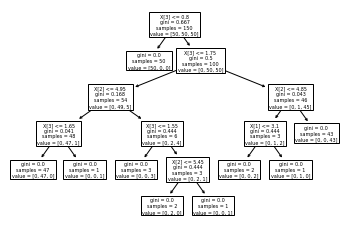

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
X, y = load_iris(return_X_y=True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
tree.plot_tree(clf.fit(X, y)) 

## Regression trees

A regression tree is constructed in the same manner as a classification tree except that the impurity measure that is appropriate for classification is replaced by a measure appropirate for regression. 
 
In regression, the goodness of a split is measure by the mean squared error

$$E_m = \frac{1}{N_m}\sum_t(r^t-g_m)b_m(x^t)$$

$N_m$ is the number of training instances reaching the node $m$ and $b_m(x^t)$ is an indicator that an instance $x^t$ reaches node $m$. In a node, we use the mean of the required outputs of instances reaching the node

$$g_m=\frac{\sum_tb_m(x^t)r^t}{\sum_tb_m(x^t)}$$

If the error is acceptable, i.e., $E_m<\theta_r$, then a leaf node is created and it stores the $g_m$ value. This creates a piecewise constant approximation with discontinuities at leaf boundaries. 

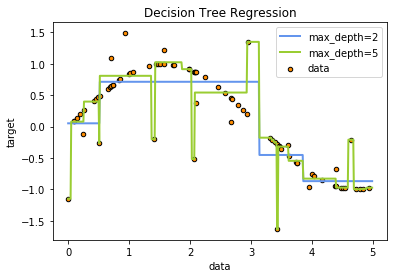

In [ ]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Lab 8: Linear Discrimination

## Linear Discrimination Analysis

Automatically created module for IPython interactive environment


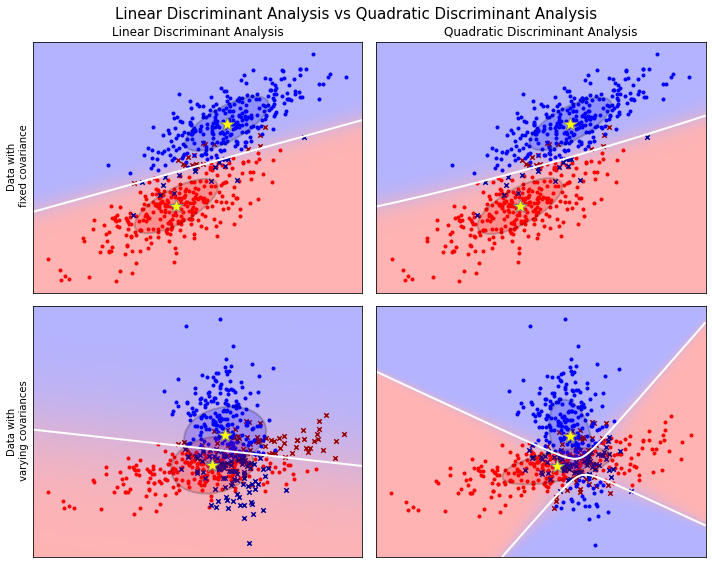

In [ ]:
print(__doc__)

from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# #############################################################################
# Colormap
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)


# #############################################################################
# Generate datasets
def dataset_fixed_cov():
    '''Generate 2 Gaussians samples with the same covariance matrix'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -0.23], [0.83, .23]])
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


def dataset_cov():
    '''Generate 2 Gaussians samples with different covariance matrices'''
    n, dim = 300, 2
    np.random.seed(0)
    C = np.array([[0., -1.], [2.5, .7]]) * 2.
    X = np.r_[np.dot(np.random.randn(n, dim), C),
              np.dot(np.random.randn(n, dim), C.T) + np.array([1, 4])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y


# #############################################################################
# Plot functions
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with\n fixed covariance')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index == 3:
        plt.ylabel('Data with\n varying covariances')

    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0, X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='.', color='red')
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x',
                s=20, color='#990000')  # dark red

    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='.', color='blue')
    plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='x',
                s=20, color='#000099')  # dark blue

    # class 0 and 1 : areas
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=0)
    plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

    # means
    plt.plot(lda.means_[0][0], lda.means_[0][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             '*', color='yellow', markersize=15, markeredgecolor='grey')

    return splot


def plot_ellipse(splot, mean, cov, color):
    v, w = linalg.eigh(cov)
    u = w[0] / linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    # filled Gaussian at 2 standard deviation
    ell = mpl.patches.Ellipse(mean, 2 * v[0] ** 0.5, 2 * v[1] ** 0.5,
                              180 + angle, facecolor=color,
                              edgecolor='black', linewidth=2)
    ell.set_clip_box(splot.bbox)
    ell.set_alpha(0.2)
    splot.add_artist(ell)
    splot.set_xticks(())
    splot.set_yticks(())


def plot_lda_cov(lda, splot):
    plot_ellipse(splot, lda.means_[0], lda.covariance_, 'red')
    plot_ellipse(splot, lda.means_[1], lda.covariance_, 'blue')


def plot_qda_cov(qda, splot):
    plot_ellipse(splot, qda.means_[0], qda.covariance_[0], 'red')
    plot_ellipse(splot, qda.means_[1], qda.covariance_[1], 'blue')


plt.figure(figsize=(10, 8), facecolor='white')
plt.suptitle('Linear Discriminant Analysis vs Quadratic Discriminant Analysis',
             y=0.98, fontsize=15)
for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    # Linear Discriminant Analysis
    lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plot_lda_cov(lda, splot)
    plt.axis('tight')

    # Quadratic Discriminant Analysis
    qda = QuadraticDiscriminantAnalysis(store_covariance=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index=2 * i + 2)
    plot_qda_cov(qda, splot)
    plt.axis('tight')
    
    
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

## Support Vector Machine

Automatically created module for IPython interactive environment


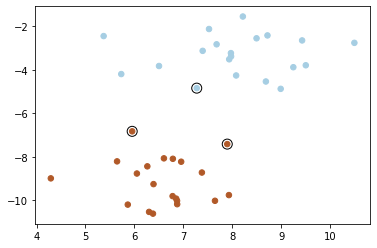

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

# Lab 9: Neural network

## Multiple Layer classifier

Automatically created module for IPython interactive environment
Iteration 1, loss = 0.32009978
Iteration 2, loss = 0.15347534
Iteration 3, loss = 0.11544755
Iteration 4, loss = 0.09279764
Iteration 5, loss = 0.07889367
Iteration 6, loss = 0.07170497
Iteration 7, loss = 0.06282111
Iteration 8, loss = 0.05530788
Iteration 9, loss = 0.04960484
Iteration 10, loss = 0.04645355


/home/liuliang/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.986800
Test set score: 0.970000


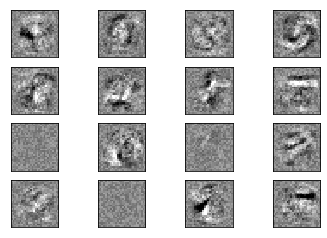

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

print(__doc__)

# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255.

# rescale the data, use the traditional train/test split
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

## Varying regularization in Multi-layer Perceptron

Automatically created module for IPython interactive environment


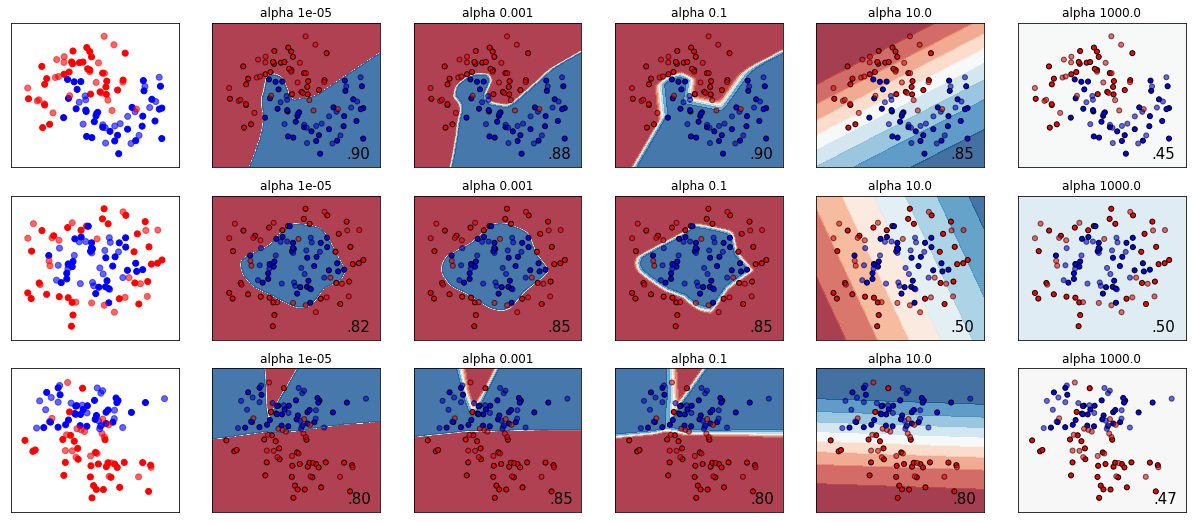

In [ ]:
print(__doc__)


# Author: Issam H. Laradji
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier

h = .02  # step size in the mesh

alphas = np.logspace(-5, 3, 5)
names = ['alpha ' + str(i) for i in alphas]

classifiers = []
for i in alphas:
    classifiers.append(MLPClassifier(solver='lbfgs', alpha=i, random_state=1,
                                     hidden_layer_sizes=[100, 100]))

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=0, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]

figure = plt.figure(figsize=(17, 9))
i = 1
# iterate over datasets
for X, y in datasets:
    # preprocess dataset, split into training and test part
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='black', s=25)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6, edgecolors='black', s=25)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

# Lab 10: Local Models

## SOM

In [ ]:
from minisom import MiniSom   
data = [[ 0.80,  0.55,  0.22,  0.03],
        [ 0.82,  0.50,  0.23,  0.03],
        [ 0.80,  0.54,  0.22,  0.03],
        [ 0.80,  0.53,  0.26,  0.03],
        [ 0.79,  0.56,  0.22,  0.03],
        [ 0.75,  0.60,  0.25,  0.03],
        [ 0.77,  0.59,  0.22,  0.03]]    

som = MiniSom(6, 6, 4, sigma=0.5, learning_rate=0.5)
som.train_random(data, 100)

Training...
 [ 1000 / 1000 ] 100% - 0:00:00 left 
 quantization error: 7.347051631709537e-05
 topographic error: 0.13333333333333333

...ready!


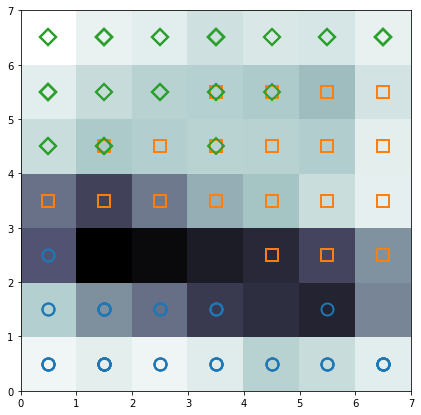

In [ ]:
from minisom import MiniSom
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

data = np.genfromtxt('/users/liuliang_2/dropbox/Machine Learning/iris.csv', delimiter=',', usecols=(0, 1, 2, 3))
# data normalization
data = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, data)

# Initialization and training
som = MiniSom(7, 7, 4, sigma=3, learning_rate=0.5, 
              neighborhood_function='triangle', random_seed=10)

som.pca_weights_init(data)
print("Training...")
som.train_batch(data, 1000, verbose=True)  # random training
print("\n...ready!")

plt.figure(figsize=(7, 7))
# Plotting the response for each pattern in the iris dataset
plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
#plt.colorbar()

target = np.genfromtxt('/users/liuliang_2/dropbox/Machine Learning/iris.csv', delimiter=',', usecols=(4), dtype=str)
t = np.zeros(len(target), dtype=int)
t[target == 'setosa'] = 0
t[target == 'versicolor'] = 1
t[target == 'virginica'] = 2

# use different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['C0', 'C1', 'C2']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)
plt.axis([0, 7, 0, 7])
plt.show()



# Lab 11: Kernel Machines

## kernel SVM

[1]


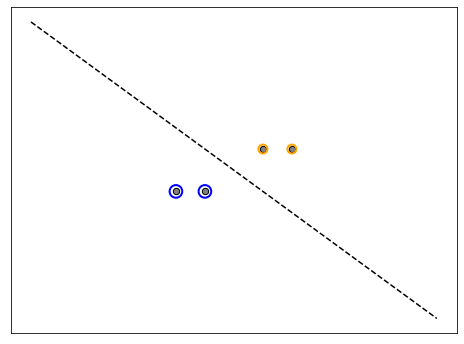

In [ ]:
import numpy as np
X = np.array([[-1, -1], [-2, -1], [1, 1], [2, 1]])
y = np.array([1, 1, 2, 2])

def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)

from sklearn.svm import SVC
clf = SVC(gamma='auto',kernel='linear')
clf.fit(X, y)
print(clf.predict([[-0.8, -1]]))

plt.figure(figsize=(8, 6))

zero_class = np.where(Y==1)
one_class = np.where(Y==2)
plt.scatter(X[:, 0], X[:, 1], s=40, c='gray', edgecolors=(0, 0, 0))
plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b',
                facecolors='none', linewidths=2, label='Class 1')
plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange',
                facecolors='none', linewidths=2, label='Class 2')

min_x = np.min(X[:, 0])
max_x = np.max(X[:, 0])
plot_hyperplane(clf, min_x, max_x, 'k--', 'Boundary\nfor class 1')
plt.xticks(())
plt.yticks(())
plt.show()

## multilabel classification

Automatically created module for IPython interactive environment


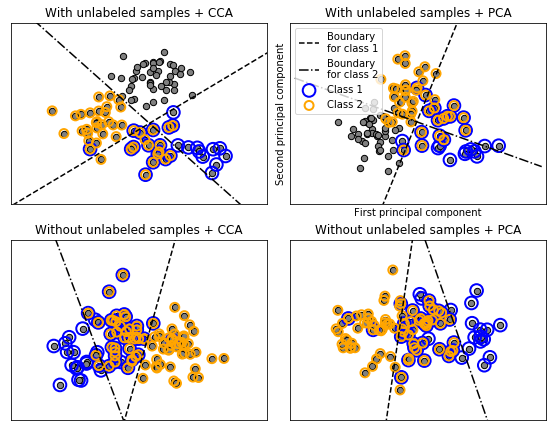

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA


def plot_hyperplane(clf, min_x, max_x, linestyle, label):
    # get the separating hyperplane
    w = clf.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (clf.intercept_[0]) / w[1]
    plt.plot(xx, yy, linestyle, label=label)


def plot_subfigure(X, Y, subplot, title, transform):
    if transform == "pca":
        X = PCA(n_components=2).fit_transform(X)
    elif transform == "cca":
        X = CCA(n_components=2).fit(X, Y).transform(X)
    else:
        raise ValueError

    min_x = np.min(X[:, 0])
    max_x = np.max(X[:, 0])

    min_y = np.min(X[:, 1])
    max_y = np.max(X[:, 1])

    classif = OneVsRestClassifier(SVC(kernel='linear',gamma='auto'))
    classif.fit(X, Y)

    plt.subplot(2, 2, subplot)
    plt.title(title)

    zero_class = np.where(Y[:, 0])
    one_class = np.where(Y[:, 1])
    plt.scatter(X[:, 0], X[:, 1], s=40, c='gray', edgecolors=(0, 0, 0))
    plt.scatter(X[zero_class, 0], X[zero_class, 1], s=160, edgecolors='b',
                facecolors='none', linewidths=2, label='Class 1')
    plt.scatter(X[one_class, 0], X[one_class, 1], s=80, edgecolors='orange',
                facecolors='none', linewidths=2, label='Class 2')

    plot_hyperplane(classif.estimators_[0], min_x, max_x, 'k--',
                    'Boundary\nfor class 1')
    plot_hyperplane(classif.estimators_[1], min_x, max_x, 'k-.',
                    'Boundary\nfor class 2')
    plt.xticks(())
    plt.yticks(())

    plt.xlim(min_x - .5 * max_x, max_x + .5 * max_x)
    plt.ylim(min_y - .5 * max_y, max_y + .5 * max_y)
    if subplot == 2:
        plt.xlabel('First principal component')
        plt.ylabel('Second principal component')
        plt.legend(loc="upper left")


plt.figure(figsize=(8, 6))

X, Y = make_multilabel_classification(n_classes=2, n_labels=1,
                                      allow_unlabeled=True,
                                      random_state=1)


plot_subfigure(X, Y, 1, "With unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 2, "With unlabeled samples + PCA", "pca")

X, Y = make_multilabel_classification(n_classes=2, n_labels=1,
                                      allow_unlabeled=False,
                                      random_state=1)

plot_subfigure(X, Y, 3, "Without unlabeled samples + CCA", "cca")
plot_subfigure(X, Y, 4, "Without unlabeled samples + PCA", "pca")

plt.subplots_adjust(.04, .02, .97, .94, .09, .2)
plt.show()

# Lab 12: Hidden Markov Models

## Sampling from HMM

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from hmmlearn import hmm

#Prepare parameters for a 4-components HMM Initial population probability
startprob = np.array([0.6, 0.3, 0.1, 0.0])

# The transition matrix, note that there are no transitions possible
# between component 1 and 3
transmat = np.array([[0.7, 0.2, 0.0, 0.1],
                     [0.3, 0.5, 0.2, 0.0],
                     [0.0, 0.3, 0.5, 0.2],
                     [0.2, 0.0, 0.2, 0.6]])
# The means of each component
means = np.array([[0.0,  0.0],
                  [0.0, 11.0],
                  [9.0, 10.0],
                  [11.0, -1.0]])
# The covariance of each component
covars = .5 * np.tile(np.identity(2), (4, 1, 1))

# Build an HMM instance and set parameters
model = hmm.GaussianHMM(n_components=4, covariance_type="full")

# Instead of fitting it from the data, we directly set the estimated
# parameters, the means and covariance of the components
model.startprob_ = startprob
model.transmat_ = transmat
model.means_ = means
model.covars_ = covars
# Generate samples
X, Z = model.sample(500)

# Plot the sampled data
plt.plot(X[:, 0], X[:, 1], ".-", label="observations", ms=6,
         mfc="orange", alpha=0.7)

# Indicate the component numbers
for i, m in enumerate(means):
    plt.text(m[0], m[1], 'Component %i' % (i + 1),
             size=17, horizontalalignment='center',
             bbox=dict(alpha=.7, facecolor='w'))
plt.legend(loc='best')
plt.show()

Automatically created module for IPython interactive environment


<Figure size 640x480 with 1 Axes>

## Fit HMM

In [ ]:
#Consider two 1D sequences:

X1 = [[0.5], [1.0], [-1.0], [0.42], [0.24]]
X2 = [[2.4], [4.2], [0.5], [-0.24]]

#To pass both sequences to fit or predict, first concatenate them into a single array and then compute an array of sequence lengths:

X = np.concatenate([X1, X2])
lengths = [len(X1), len(X2)]

#Finally, just call the desired method with X and lengths:
model  = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=100)
model.fit(X, lengths)

Z = model.predict(X)

print(Z)

#monitor convergence
model.monitor_.converged

#saving and loading hmm
import pickle
with open("filename.pkl", "wb") as file: pickle.dump(model, file)
with open("filename.pkl", "rb") as file: pickle.load(file)


Fitting a model with 14 free scalar parameters with only 9 data points will result in a degenerate solution.


[0 2 2 0 2 2 2 0 2]


# Lab 13: Reinforcement Learning

## Taxi 

In [ ]:
import gym
env = gym.make("Taxi-v3").env
env.render()

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [ ]:
env.reset() # reset environment to a new, random state
env.render()

print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

Action Space Discrete(6)
State Space Discrete(500)


In [ ]:
state = env.encode(3, 1, 2, 0) # (taxi row, taxi column, passenger index, destination index)
print("State:", state)

env.s = state
env.render()

State: 328
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [ ]:
#Since every state is in this matrix, we can see the default reward values assigned to our illustration's state:
env.P[328]

{0: [(1.0, 428, -1, False)],
 1: [(1.0, 228, -1, False)],
 2: [(1.0, 348, -1, False)],
 3: [(1.0, 328, -1, False)],
 4: [(1.0, 328, -10, False)],
 5: [(1.0, 328, -10, False)]}

## Solving the environment without Reinforcement Learning

In [ ]:
env.s = 328  # set environment to illustration's state

epochs = 0
penalties, reward = 0, 0

frames = [] # for animation

done = False

while not done:
    action = env.action_space.sample()
    state, reward, done, info = env.step(action)

    if reward == -10:
        penalties += 1
    
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )

    epochs += 1
    
    
print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))


Timesteps taken: 419
Penalties incurred: 133


In [ ]:
from IPython.display import clear_output
from time import sleep

def print_frames(frames):
    for i, frame in enumerate(frames):
        clear_output(wait=True)
        print(frame['frame'])
        print(f"Timestep: {i + 1}")
        print(f"State: {frame['state']}")
        print(f"Action: {frame['action']}")
        print(f"Reward: {frame['reward']}")
        sleep(.1)
               
print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 419
State: 0
Action: 5
Reward: 20


## Solving the enviroment with reinforcement learning

In [ ]:
import numpy as np
q_table = np.zeros([env.observation_space.n, env.action_space.n])

import random
from IPython.display import clear_output

# Hyperparameters
alpha = 0.1
gamma = 0.6
epsilon = 0.1

# For plotting metrics
all_epochs = []
all_penalties = []

for i in range(1, 100001):
    state = env.reset()

    epochs, penalties, reward, = 0, 0, 0
    done = False
    
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample() # Explore action space
        else:
            action = np.argmax(q_table[state]) # Exploit learned values

        next_state, reward, done, info = env.step(action) 
        
        old_value = q_table[state, action]
        next_max = np.max(q_table[next_state])
        
        new_value = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)
        q_table[state, action] = new_value

        if reward == -10:
            penalties += 1

        state = next_state
        epochs += 1
        
    if i % 100 == 0:
        clear_output(wait=True)
        print(f"Episode: {i}")

print("Training finished.\n")

Episode: 100000
Training finished.



### Q-table has been established over 100,000 episodes

In [ ]:
q_table[328]

array([ -2.40460902,  -2.27325184,  -2.40138833,  -2.35452589,
       -10.7454081 , -10.31524276])

## Using Q-table

In [ ]:
env.s = 328  # set environment to illustration's state

epochs = 0
penalties, reward = 0, 0

frames = [] # for animation

done = False

while not done:
    #action = env.action_space.sample()
    #state, reward, done, info = env.step(action)
    action = np.argmax(q_table[env.s])
    state, reward, done, info = env.step(action)

    if reward == -10:
        penalties += 1
    
    # Put each rendered frame into dict for animation
    frames.append({
        'frame': env.render(mode='ansi'),
        'state': state,
        'action': action,
        'reward': reward
        }
    )
    epochs += 1

print_frames(frames)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Dropoff)

Timestep: 10
State: 0
Action: 5
Reward: 20


## Evaluation of performance

In [ ]:
total_epochs, total_penalties = 0, 0
episodes = 100

for _ in range(episodes):
    state = env.reset()
    epochs, penalties, reward = 0, 0, 0
    
    done = False
    
    while not done:
        action = np.argmax(q_table[state])
        state, reward, done, info = env.step(action)

        if reward == -10:
            penalties += 1

        epochs += 1

    total_penalties += penalties
    total_epochs += epochs

print(f"Results after {episodes} episodes:")
print(f"Average timesteps per episode: {total_epochs / episodes}")
print(f"Average penalties per episode: {total_penalties / episodes}")

Results after 100 episodes:
Average timesteps per episode: 12.92
Average penalties per episode: 0.0
